<a href="https://colab.research.google.com/github/Yanbelo/Pharmaceutical_predict/blob/main/Letuku2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True) # add the force_remount parameter

Mounted at /content/drive


Dppiv_model

In [2]:
import pandas as pd
import numpy as np

In [21]:
# Dppiv_model
Dppiv = pd.read_csv('DppIV.csv', sep = ";")

# Sglt2_model
Sglt2 = pd.read_csv('Sglt2.csv', sep=";") # Assuming Sglt2 data is in 'Sglt2.csv'

In [22]:
Dppiv.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [23]:
x1 =Dppiv[['Molecule ChEMBL ID','Smiles','Standard Type','Standard Value','Standard Relation',
       'Standard Units']]
x2 =Sglt2[['Molecule ChEMBL ID','Smiles','Standard Type','Standard Value','Standard Relation',
       'Standard Units']]

In [24]:
x1.head()

Molecule ChEMBL ID                                             Smiles  \
0        CHEMBL25437  N[C@H](C(=O)N1CCCC1)[C@H]1CC[C@H](NS(=O)(=O)c2...   
1       CHEMBL184961                N[C@@H](CC(=O)N1CCSC1)Cc1cccc(F)c1F   
2       CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3       CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4       CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   

  Standard Type  Standard Value Standard Relation Standard Units  
0          IC50            88.0               '='             nM  
1          IC50          9400.0               '='             nM  
2          IC50             4.1               '='             nM  
3          IC50            27.0               '='             nM  
4          IC50            11.5               '='             nM

In [25]:
x2.head()

Molecule ChEMBL ID                                             Smiles  \
0      CHEMBL3109014  OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...   
1       CHEMBL590752  Cc1ccoc1-c1nnc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O...   
2       CHEMBL590021  OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3nnc(-c4cc5ccccc5...   
3       CHEMBL592686  Cn1cccc1-c1nnc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O...   
4       CHEMBL606689  Cc1ccc(-c2nnc(Cc3cc(C4O[C@H](CO)[C@@H](O)[C@H]...   

  Standard Type  Standard Value Standard Relation Standard Units  
0          IC50            11.0               '='             nM  
1          IC50           106.0               '='             nM  
2          IC50            44.5               '='             nM  
3          IC50           119.0               '='             nM  
4          IC50           103.0               '='             nM

In [26]:
x1.shape

(7291, 6)

In [27]:
x2.shape

(2023, 6)

In [28]:
x1['Standard Units'].value_counts()

Standard Units
nM                6027
%                  879
hr                  55
ug.mL-1             48
10'-4/s             12
10'6/M/s             9
M-1 s-1              8
/min                 8
uM                   7
10^-4/s              6
10'6/M/min           6
10^5/M/s             5
10'-3/s              4
10'5/M/s             4
nmol/hr/microg       4
10'-2/s              3
10^2kJ/mol           2
s-1                  2
10'7/M/s             2
10^3kJ/mol           1
10'3/M/s             1
10^4/M/s             1
10^5/M               1
10'8/M/min           1
10'-5/s              1
10'4/M/s             1
Name: count, dtype: int64

In [29]:
x2['Standard Units'].value_counts()

Standard Units
nM    1821
%      182
hr       2
Name: count, dtype: int64

In [30]:
x1['Standard Relation'].value_counts()

Standard Relation
'='     6087
'>'      803
'<'       44
'>>'       5
'>='       2
'~'        2
'<='       1
Name: count, dtype: int64

In [31]:
x2['Standard Relation'].value_counts()

Standard Relation
'='    1911
'>'      64
'<'       3
Name: count, dtype: int64

In [32]:
x1['Standard Type'].value_counts()

Standard Type
IC50                              5375
Inhibition                         733
Ki                                 703
Activity                            98
Stability                           80
Selectivity index                   68
K                                   62
T1/2                                34
Kd                                  26
Km                                  23
TIME                                21
Drug metabolism                     18
Ratio IC50                          12
K obs / 1                            8
Ratio Ki                             5
Vmax/Km                              4
Vmax                                 4
EC50                                 4
IC5                                  2
K inact                              2
Kapp                                 1
deltaG                               1
% Ctrl                               1
deltaH                               1
% Inhibition of Control Values       1
Ka                                   1
TdeltaS                              1
Kdiss                                1
INH                                  1
Name: count, dtype: int64

In [33]:
x2['Standard Type'].value_counts()

Standard Type
IC50          1601
EC50           206
Inhibition     182
Ki              31
T1/2             2
Ratio IC50       1
Name: count, dtype: int64

In [34]:
x1=x1.dropna()

In [35]:
df =x1[x1['Standard Units'].str.contains('nM')]
df

Molecule ChEMBL ID                                             Smiles  \
0           CHEMBL25437  N[C@H](C(=O)N1CCCC1)[C@H]1CC[C@H](NS(=O)(=O)c2...   
1          CHEMBL184961                N[C@@H](CC(=O)N1CCSC1)Cc1cccc(F)c1F   
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
...                 ...                                                ...   
7283        CHEMBL77538              N#Cc1ccc(NCCNCC(=O)N2CCC[C@H]2C#N)nc1   
7284      CHEMBL4453917  CC#CCn1c(N2CCC[C@@H](N)C2)cc(=O)n(Cc2cccc(F)c2...   
7285       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7288       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7290         CHEMBL1422  N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...   

     Standard Type  Standard Value Standard Relation Standard Units  
0             IC50            88.0               '='             nM  
1             IC50          9400.0               '='             nM  
2             IC50             4.1               '='             nM  
3             IC50            27.0               '='             nM  
4             IC50            11.5               '='             nM  
...            ...             ...               ...            ...  
7283          IC50            22.0               '='             nM  
7284          IC50            93.2               '='             nM  
7285          IC50             3.5               '='             nM  
7288          IC50            51.0               '='             nM  
7290          IC50             8.8               '='             nM  

[6018 rows x 6 columns]

In [36]:
x2=x2.dropna()

In [37]:
df2 =x2[x2['Standard Units'].str.contains('nM')]
df2

Molecule ChEMBL ID                                             Smiles  \
0         CHEMBL3109014  OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...   
1          CHEMBL590752  Cc1ccoc1-c1nnc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O...   
2          CHEMBL590021  OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3nnc(-c4cc5ccccc5...   
3          CHEMBL592686  Cn1cccc1-c1nnc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O...   
4          CHEMBL606689  Cc1ccc(-c2nnc(Cc3cc(C4O[C@H](CO)[C@@H](O)[C@H]...   
...                 ...                                                ...   
2018      CHEMBL2107830  OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(O[C@H]4CCOC4...   
2019      CHEMBL2018096  OC[C@H]1O[C@@H](c2ccc(F)c(Cc3cc4ccccc4s3)c2)[C...   
2020      CHEMBL2048484  Cc1ccc([C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...   
2021      CHEMBL3654929  OC[C@H]1O[C@@H](c2cc(Cc3ccc(C4CCCC4)cc3)c(Cl)c...   
2022      CHEMBL3703804  CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...   

     Standard Type  Standard Value Standard Relation Standard Units  
0             IC50           11.00               '='             nM  
1             IC50          106.00               '='             nM  
2             IC50           44.50               '='             nM  
3             IC50          119.00               '='             nM  
4             IC50          103.00               '='             nM  
...            ...             ...               ...            ...  
2018          IC50            3.10               '='             nM  
2019          EC50            7.40               '='             nM  
2020          EC50            2.20               '='             nM  
2021          IC50            1.16               '='             nM  
2022          IC50            1.52               '='             nM  

[1821 rows x 6 columns]

In [38]:
df['Standard Type'].value_counts()

Standard Type
IC50        5242
Ki           692
Activity      29
Kd            26
Km            23
EC50           4
IC5            1
INH            1
Name: count, dtype: int64

In [39]:
df2['Standard Type'].value_counts()

Standard Type
IC50    1584
EC50     206
Ki        31
Name: count, dtype: int64

In [40]:
df.head()

Molecule ChEMBL ID                                             Smiles  \
0        CHEMBL25437  N[C@H](C(=O)N1CCCC1)[C@H]1CC[C@H](NS(=O)(=O)c2...   
1       CHEMBL184961                N[C@@H](CC(=O)N1CCSC1)Cc1cccc(F)c1F   
2       CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3       CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4       CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   

  Standard Type  Standard Value Standard Relation Standard Units  
0          IC50            88.0               '='             nM  
1          IC50          9400.0               '='             nM  
2          IC50             4.1               '='             nM  
3          IC50            27.0               '='             nM  
4          IC50            11.5               '='             nM

In [41]:
df =df[df['Standard Type'].str.contains('IC50')]
df

Molecule ChEMBL ID                                             Smiles  \
0           CHEMBL25437  N[C@H](C(=O)N1CCCC1)[C@H]1CC[C@H](NS(=O)(=O)c2...   
1          CHEMBL184961                N[C@@H](CC(=O)N1CCSC1)Cc1cccc(F)c1F   
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
...                 ...                                                ...   
7283        CHEMBL77538              N#Cc1ccc(NCCNCC(=O)N2CCC[C@H]2C#N)nc1   
7284      CHEMBL4453917  CC#CCn1c(N2CCC[C@@H](N)C2)cc(=O)n(Cc2cccc(F)c2...   
7285       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7288       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7290         CHEMBL1422  N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...   

     Standard Type  Standard Value Standard Relation Standard Units  
0             IC50            88.0               '='             nM  
1             IC50          9400.0               '='             nM  
2             IC50             4.1               '='             nM  
3             IC50            27.0               '='             nM  
4             IC50            11.5               '='             nM  
...            ...             ...               ...            ...  
7283          IC50            22.0               '='             nM  
7284          IC50            93.2               '='             nM  
7285          IC50             3.5               '='             nM  
7288          IC50            51.0               '='             nM  
7290          IC50             8.8               '='             nM  

[5242 rows x 6 columns]

In [42]:
df2 =df2[df2['Standard Type'].str.contains('IC50')]
df2

Molecule ChEMBL ID                                             Smiles  \
0         CHEMBL3109014  OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...   
1          CHEMBL590752  Cc1ccoc1-c1nnc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O...   
2          CHEMBL590021  OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3nnc(-c4cc5ccccc5...   
3          CHEMBL592686  Cn1cccc1-c1nnc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O...   
4          CHEMBL606689  Cc1ccc(-c2nnc(Cc3cc(C4O[C@H](CO)[C@@H](O)[C@H]...   
...                 ...                                                ...   
2016       CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   
2017      CHEMBL1770248  CCOc1ccc(Cc2cc([C@]34OC[C@](CO)(O3)[C@@H](O)[C...   
2018      CHEMBL2107830  OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(O[C@H]4CCOC4...   
2021      CHEMBL3654929  OC[C@H]1O[C@@H](c2cc(Cc3ccc(C4CCCC4)cc3)c(Cl)c...   
2022      CHEMBL3703804  CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...   

     Standard Type  Standard Value Standard Relation Standard Units  
0             IC50          11.000               '='             nM  
1             IC50         106.000               '='             nM  
2             IC50          44.500               '='             nM  
3             IC50         119.000               '='             nM  
4             IC50         103.000               '='             nM  
...            ...             ...               ...            ...  
2016          IC50          34.600               '='             nM  
2017          IC50           0.877               '='             nM  
2018          IC50           3.100               '='             nM  
2021          IC50           1.160               '='             nM  
2022          IC50           1.520               '='             nM  

[1584 rows x 6 columns]

In [43]:
df['Standard Type'].value_counts()

Standard Type
IC50    5242
Name: count, dtype: int64

In [44]:
df2['Standard Type'].value_counts()

Standard Type
IC50    1584
Name: count, dtype: int64

In [45]:
# prompt: remove pIC50 and Log IC50 in the standard type

df = df[~df['Standard Type'].str.contains('pIC50')]
df = df[~df['Standard Type'].str.contains('Log IC50')]
df['Standard Type'].value_counts()


Standard Type
IC50    5242
Name: count, dtype: int64

In [46]:
df2 = df2[~df2['Standard Type'].str.contains('pIC50')]
df2 = df2[~df2['Standard Type'].str.contains('Log IC50')]
df2['Standard Type'].value_counts()


Standard Type
IC50    1584
Name: count, dtype: int64

In [47]:
df

Molecule ChEMBL ID                                             Smiles  \
0           CHEMBL25437  N[C@H](C(=O)N1CCCC1)[C@H]1CC[C@H](NS(=O)(=O)c2...   
1          CHEMBL184961                N[C@@H](CC(=O)N1CCSC1)Cc1cccc(F)c1F   
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
...                 ...                                                ...   
7283        CHEMBL77538              N#Cc1ccc(NCCNCC(=O)N2CCC[C@H]2C#N)nc1   
7284      CHEMBL4453917  CC#CCn1c(N2CCC[C@@H](N)C2)cc(=O)n(Cc2cccc(F)c2...   
7285       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7288       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7290         CHEMBL1422  N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...   

     Standard Type  Standard Value Standard Relation Standard Units  
0             IC50            88.0               '='             nM  
1             IC50          9400.0               '='             nM  
2             IC50             4.1               '='             nM  
3             IC50            27.0               '='             nM  
4             IC50            11.5               '='             nM  
...            ...             ...               ...            ...  
7283          IC50            22.0               '='             nM  
7284          IC50            93.2               '='             nM  
7285          IC50             3.5               '='             nM  
7288          IC50            51.0               '='             nM  
7290          IC50             8.8               '='             nM  

[5242 rows x 6 columns]

# Label df



In [60]:
active = df.loc[df['Standard Value']<= 100]
active

Molecule ChEMBL ID                                             Smiles  \
0           CHEMBL25437  N[C@H](C(=O)N1CCCC1)[C@H]1CC[C@H](NS(=O)(=O)c2...   
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
5          CHEMBL189881  C[C@@H](c1ccc(-c2ccc(F)cc2)cc1)[C@H](N)C(=O)N1...   
...                 ...                                                ...   
7283        CHEMBL77538              N#Cc1ccc(NCCNCC(=O)N2CCC[C@H]2C#N)nc1   
7284      CHEMBL4453917  CC#CCn1c(N2CCC[C@@H](N)C2)cc(=O)n(Cc2cccc(F)c2...   
7285       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7288       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7290         CHEMBL1422  N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...   

     Standard Type  Standard Value Standard Relation Standard Units  
0             IC50            88.0               '='             nM  
2             IC50             4.1               '='             nM  
3             IC50            27.0               '='             nM  
4             IC50            11.5               '='             nM  
5             IC50            64.0               '='             nM  
...            ...             ...               ...            ...  
7283          IC50            22.0               '='             nM  
7284          IC50            93.2               '='             nM  
7285          IC50             3.5               '='             nM  
7288          IC50            51.0               '='             nM  
7290          IC50             8.8               '='             nM  

[2661 rows x 6 columns]

In [54]:
active.shape


(2318, 6)

In [61]:
inactive = df.loc[df['Standard Value']>=100]
inactive

Molecule ChEMBL ID                                             Smiles  \
1          CHEMBL184961                N[C@@H](CC(=O)N1CCSC1)Cc1cccc(F)c1F   
9          CHEMBL175988                            CN(C)CCCNCC(F)=C1CCCCC1   
10         CHEMBL176121                              C(CNC1CCCCC1)=C1CCCC1   
15         CHEMBL362018  N#C[C@@H]1CCCN1C(=O)[C@@H](N)CC(=O)N1CCN(C(c2c...   
25        CHEMBL3686735                       C[C@H](NC(=S)[C@H](C)N)B(O)O   
...                 ...                                                ...   
7271       CHEMBL288114                            O=C(O)c1cc(O)c(O)c(O)c1   
7272       CHEMBL257839  OC[C@H]1O[C@@H](Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc...   
7273           CHEMBL44               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7274       CHEMBL275638                        O=c1cc(-c2ccccc2)oc2ccccc12   
7275          CHEMBL151            O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12   

     Standard Type  Standard Value Standard Relation Standard Units  
1             IC50          9400.0               '='             nM  
9             IC50       1000000.0               '>'             nM  
10            IC50       1000000.0               '>'             nM  
15            IC50           274.0               '='             nM  
25            IC50          7700.0               '='             nM  
...            ...             ...               ...            ...  
7271          IC50          4650.0               '='             nM  
7272          IC50           420.0               '='             nM  
7273          IC50           480.0               '='             nM  
7274          IC50           170.0               '='             nM  
7275          IC50           120.0               '='             nM  

[2600 rows x 6 columns]

In [62]:
df

Molecule ChEMBL ID                                             Smiles  \
0           CHEMBL25437  N[C@H](C(=O)N1CCCC1)[C@H]1CC[C@H](NS(=O)(=O)c2...   
1          CHEMBL184961                N[C@@H](CC(=O)N1CCSC1)Cc1cccc(F)c1F   
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
...                 ...                                                ...   
7283        CHEMBL77538              N#Cc1ccc(NCCNCC(=O)N2CCC[C@H]2C#N)nc1   
7284      CHEMBL4453917  CC#CCn1c(N2CCC[C@@H](N)C2)cc(=O)n(Cc2cccc(F)c2...   
7285       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7288       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7290         CHEMBL1422  N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...   

     Standard Type  Standard Value Standard Relation Standard Units  
0             IC50            88.0               '='             nM  
1             IC50          9400.0               '='             nM  
2             IC50             4.1               '='             nM  
3             IC50            27.0               '='             nM  
4             IC50            11.5               '='             nM  
...            ...             ...               ...            ...  
7283          IC50            22.0               '='             nM  
7284          IC50            93.2               '='             nM  
7285          IC50             3.5               '='             nM  
7288          IC50            51.0               '='             nM  
7290          IC50             8.8               '='             nM  

[5242 rows x 6 columns]

In [63]:
df_1 = df[~df['Standard Units'].str.contains('ug.mL-1')]
df_1

Molecule ChEMBL ID                                             Smiles  \
0           CHEMBL25437  N[C@H](C(=O)N1CCCC1)[C@H]1CC[C@H](NS(=O)(=O)c2...   
1          CHEMBL184961                N[C@@H](CC(=O)N1CCSC1)Cc1cccc(F)c1F   
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
...                 ...                                                ...   
7283        CHEMBL77538              N#Cc1ccc(NCCNCC(=O)N2CCC[C@H]2C#N)nc1   
7284      CHEMBL4453917  CC#CCn1c(N2CCC[C@@H](N)C2)cc(=O)n(Cc2cccc(F)c2...   
7285       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7288       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7290         CHEMBL1422  N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...   

     Standard Type  Standard Value Standard Relation Standard Units  
0             IC50            88.0               '='             nM  
1             IC50          9400.0               '='             nM  
2             IC50             4.1               '='             nM  
3             IC50            27.0               '='             nM  
4             IC50            11.5               '='             nM  
...            ...             ...               ...            ...  
7283          IC50            22.0               '='             nM  
7284          IC50            93.2               '='             nM  
7285          IC50             3.5               '='             nM  
7288          IC50            51.0               '='             nM  
7290          IC50             8.8               '='             nM  

[5242 rows x 6 columns]

In [66]:
active = df_1.loc[df['Standard Value']<= 62]
active

Molecule ChEMBL ID                                             Smiles  \
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
17         CHEMBL201268             N#C[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccccc1   
18        CHEMBL3697947  N[C@H]1C[C@@H](N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)...   
...                 ...                                                ...   
7282       CHEMBL376359    Cn1c(=O)cc(N2CCC[C@@H](N)C2)n(Cc2ccccc2C#N)c1=O   
7283        CHEMBL77538              N#Cc1ccc(NCCNCC(=O)N2CCC[C@H]2C#N)nc1   
7285       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7288       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7290         CHEMBL1422  N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...   

     Standard Type  Standard Value Standard Relation Standard Units  
2             IC50            4.10               '='             nM  
3             IC50           27.00               '='             nM  
4             IC50           11.50               '='             nM  
17            IC50           27.00               '='             nM  
18            IC50            2.90               '='             nM  
...            ...             ...               ...            ...  
7282          IC50            8.02               '='             nM  
7283          IC50           22.00               '='             nM  
7285          IC50            3.50               '='             nM  
7288          IC50           51.00               '='             nM  
7290          IC50            8.80               '='             nM  

[2318 rows x 6 columns]

In [67]:
inactive = df_1.loc[df['Standard Value']>= 100]
inactive

Molecule ChEMBL ID                                             Smiles  \
1          CHEMBL184961                N[C@@H](CC(=O)N1CCSC1)Cc1cccc(F)c1F   
9          CHEMBL175988                            CN(C)CCCNCC(F)=C1CCCCC1   
10         CHEMBL176121                              C(CNC1CCCCC1)=C1CCCC1   
15         CHEMBL362018  N#C[C@@H]1CCCN1C(=O)[C@@H](N)CC(=O)N1CCN(C(c2c...   
25        CHEMBL3686735                       C[C@H](NC(=S)[C@H](C)N)B(O)O   
...                 ...                                                ...   
7271       CHEMBL288114                            O=C(O)c1cc(O)c(O)c(O)c1   
7272       CHEMBL257839  OC[C@H]1O[C@@H](Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc...   
7273           CHEMBL44               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7274       CHEMBL275638                        O=c1cc(-c2ccccc2)oc2ccccc12   
7275          CHEMBL151            O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12   

     Standard Type  Standard Value Standard Relation Standard Units  
1             IC50          9400.0               '='             nM  
9             IC50       1000000.0               '>'             nM  
10            IC50       1000000.0               '>'             nM  
15            IC50           274.0               '='             nM  
25            IC50          7700.0               '='             nM  
...            ...             ...               ...            ...  
7271          IC50          4650.0               '='             nM  
7272          IC50           420.0               '='             nM  
7273          IC50           480.0               '='             nM  
7274          IC50           170.0               '='             nM  
7275          IC50           120.0               '='             nM  

[2600 rows x 6 columns]

In [68]:
active['Standard Units'].value_counts()

Standard Units
nM    2318
Name: count, dtype: int64

In [69]:
inactive['Standard Units'].value_counts()

Standard Units
nM    2600
Name: count, dtype: int64

In [70]:
active = active.assign(label =1)
inactive = inactive.assign(label =0)

In [71]:
active

Molecule ChEMBL ID                                             Smiles  \
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
17         CHEMBL201268             N#C[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccccc1   
18        CHEMBL3697947  N[C@H]1C[C@@H](N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)...   
...                 ...                                                ...   
7282       CHEMBL376359    Cn1c(=O)cc(N2CCC[C@@H](N)C2)n(Cc2ccccc2C#N)c1=O   
7283        CHEMBL77538              N#Cc1ccc(NCCNCC(=O)N2CCC[C@H]2C#N)nc1   
7285       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7288       CHEMBL142703      N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2   
7290         CHEMBL1422  N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...   

     Standard Type  Standard Value Standard Relation Standard Units  label  
2             IC50            4.10               '='             nM      1  
3             IC50           27.00               '='             nM      1  
4             IC50           11.50               '='             nM      1  
17            IC50           27.00               '='             nM      1  
18            IC50            2.90               '='             nM      1  
...            ...             ...               ...            ...    ...  
7282          IC50            8.02               '='             nM      1  
7283          IC50           22.00               '='             nM      1  
7285          IC50            3.50               '='             nM      1  
7288          IC50           51.00               '='             nM      1  
7290          IC50            8.80               '='             nM      1  

[2318 rows x 7 columns]

In [72]:
inactive

Molecule ChEMBL ID                                             Smiles  \
1          CHEMBL184961                N[C@@H](CC(=O)N1CCSC1)Cc1cccc(F)c1F   
9          CHEMBL175988                            CN(C)CCCNCC(F)=C1CCCCC1   
10         CHEMBL176121                              C(CNC1CCCCC1)=C1CCCC1   
15         CHEMBL362018  N#C[C@@H]1CCCN1C(=O)[C@@H](N)CC(=O)N1CCN(C(c2c...   
25        CHEMBL3686735                       C[C@H](NC(=S)[C@H](C)N)B(O)O   
...                 ...                                                ...   
7271       CHEMBL288114                            O=C(O)c1cc(O)c(O)c(O)c1   
7272       CHEMBL257839  OC[C@H]1O[C@@H](Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc...   
7273           CHEMBL44               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7274       CHEMBL275638                        O=c1cc(-c2ccccc2)oc2ccccc12   
7275          CHEMBL151            O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12   

     Standard Type  Standard Value Standard Relation Standard Units  label  
1             IC50          9400.0               '='             nM      0  
9             IC50       1000000.0               '>'             nM      0  
10            IC50       1000000.0               '>'             nM      0  
15            IC50           274.0               '='             nM      0  
25            IC50          7700.0               '='             nM      0  
...            ...             ...               ...            ...    ...  
7271          IC50          4650.0               '='             nM      0  
7272          IC50           420.0               '='             nM      0  
7273          IC50           480.0               '='             nM      0  
7274          IC50           170.0               '='             nM      0  
7275          IC50           120.0               '='             nM      0  

[2600 rows x 7 columns]

In [73]:
combined = pd.concat([active, inactive], axis = 0)
combined

Molecule ChEMBL ID                                             Smiles  \
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
17         CHEMBL201268             N#C[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccccc1   
18        CHEMBL3697947  N[C@H]1C[C@@H](N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)...   
...                 ...                                                ...   
7271       CHEMBL288114                            O=C(O)c1cc(O)c(O)c(O)c1   
7272       CHEMBL257839  OC[C@H]1O[C@@H](Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc...   
7273           CHEMBL44               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7274       CHEMBL275638                        O=c1cc(-c2ccccc2)oc2ccccc12   
7275          CHEMBL151            O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12   

     Standard Type  Standard Value Standard Relation Standard Units  label  
2             IC50             4.1               '='             nM      1  
3             IC50            27.0               '='             nM      1  
4             IC50            11.5               '='             nM      1  
17            IC50            27.0               '='             nM      1  
18            IC50             2.9               '='             nM      1  
...            ...             ...               ...            ...    ...  
7271          IC50          4650.0               '='             nM      0  
7272          IC50           420.0               '='             nM      0  
7273          IC50           480.0               '='             nM      0  
7274          IC50           170.0               '='             nM      0  
7275          IC50           120.0               '='             nM      0  

[4918 rows x 7 columns]

In [74]:
combined.to_csv('Dppiv_filtered.csv', index=False)

# Label2

In [75]:
active2 = df2.loc[df2['Standard Value']<= 21.1]
active2

Molecule ChEMBL ID                                             Smiles  \
0         CHEMBL3109014  OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...   
8         CHEMBL1085769  CCCCCCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[...   
13        CHEMBL3639552  CCOc1ccc(Cc2cc([C@]34OC[C@](COC(C)=O)(O3)[C@@H...   
14         CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   
17        CHEMBL1642516  O[C@@H]1[C@@H](O)[C@H](c2ccc(Cl)c(Cc3ncc(-c4cc...   
...                 ...                                                ...   
2015      CHEMBL2018096  OC[C@H]1O[C@@H](c2ccc(F)c(Cc3cc4ccccc4s3)c2)[C...   
2017      CHEMBL1770248  CCOc1ccc(Cc2cc([C@]34OC[C@](CO)(O3)[C@@H](O)[C...   
2018      CHEMBL2107830  OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(O[C@H]4CCOC4...   
2021      CHEMBL3654929  OC[C@H]1O[C@@H](c2cc(Cc3ccc(C4CCCC4)cc3)c(Cl)c...   
2022      CHEMBL3703804  CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...   

     Standard Type  Standard Value Standard Relation Standard Units  
0             IC50          11.000               '='             nM  
8             IC50          17.300               '='             nM  
13            IC50           5.000               '='             nM  
14            IC50          16.000               '='             nM  
17            IC50           9.550               '='             nM  
...            ...             ...               ...            ...  
2015          IC50           8.400               '='             nM  
2017          IC50           0.877               '='             nM  
2018          IC50           3.100               '='             nM  
2021          IC50           1.160               '='             nM  
2022          IC50           1.520               '='             nM  

[823 rows x 6 columns]

In [76]:
inactive2 = df2.loc[df2['Standard Value']>= 21.1]
inactive2

Molecule ChEMBL ID                                             Smiles  \
1          CHEMBL590752  Cc1ccoc1-c1nnc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O...   
2          CHEMBL590021  OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3nnc(-c4cc5ccccc5...   
3          CHEMBL592686  Cn1cccc1-c1nnc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O...   
4          CHEMBL606689  Cc1ccc(-c2nnc(Cc3cc(C4O[C@H](CO)[C@@H](O)[C@H]...   
5         CHEMBL3679692  CC1CCC(Cc2nnc(Cc3cc(C4O[C@H](CO)[C@@H](O)[C@H]...   
...                 ...                                                ...   
1977      CHEMBL3960449  Cc1[nH]nc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[...   
1987      CHEMBL3923809  CCOc1ccc(Cc2c(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H]...   
1995       CHEMBL334384               O=C(/C=C/c1ccc(F)cc1)c1c(O)cc(O)cc1O   
2000       CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   
2016       CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   

     Standard Type  Standard Value Standard Relation Standard Units  
1             IC50           106.0               '='             nM  
2             IC50            44.5               '='             nM  
3             IC50           119.0               '='             nM  
4             IC50           103.0               '='             nM  
5             IC50           460.0               '='             nM  
...            ...             ...               ...            ...  
1977          IC50           181.0               '='             nM  
1987          IC50           185.0               '='             nM  
1995          IC50         51700.0               '='             nM  
2000          IC50           160.0               '='             nM  
2016          IC50            34.6               '='             nM  

[763 rows x 6 columns]

In [83]:
active2 = active2.assign(label =1)
inactive2 = inactive2.assign(label =0)

In [ ]:
active2

Molecule ChEMBL ID                                             Smiles  \
0         CHEMBL3109014  OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...   
8         CHEMBL1085769  CCCCCCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[...   
13        CHEMBL3639552  CCOc1ccc(Cc2cc([C@]34OC[C@](COC(C)=O)(O3)[C@@H...   
14         CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   
17        CHEMBL1642516  O[C@@H]1[C@@H](O)[C@H](c2ccc(Cl)c(Cc3ncc(-c4cc...   
...                 ...                                                ...   
2015      CHEMBL2018096  OC[C@H]1O[C@@H](c2ccc(F)c(Cc3cc4ccccc4s3)c2)[C...   
2017      CHEMBL1770248  CCOc1ccc(Cc2cc([C@]34OC[C@](CO)(O3)[C@@H](O)[C...   
2018      CHEMBL2107830  OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ccc(O[C@H]4CCOC4...   
2021      CHEMBL3654929  OC[C@H]1O[C@@H](c2cc(Cc3ccc(C4CCCC4)cc3)c(Cl)c...   
2022      CHEMBL3703804  CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...   

     Standard Type Standard Relation  Standard Value Standard Units  label  
0             IC50               '='          11.000             nM      1  
8             IC50               '='          17.300             nM      1  
13            IC50               '='           5.000             nM      1  
14            IC50               '='          16.000             nM      1  
17            IC50               '='           9.550             nM      1  
...            ...               ...             ...            ...    ...  
2015          IC50               '='           8.400             nM      1  
2017          IC50               '='           0.877             nM      1  
2018          IC50               '='           3.100             nM      1  
2021          IC50               '='           1.160             nM      1  
2022          IC50               '='           1.520             nM      1  

[816 rows x 7 columns]

In [77]:
inactive2

Molecule ChEMBL ID                                             Smiles  \
1          CHEMBL590752  Cc1ccoc1-c1nnc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O...   
2          CHEMBL590021  OC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3nnc(-c4cc5ccccc5...   
3          CHEMBL592686  Cn1cccc1-c1nnc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O...   
4          CHEMBL606689  Cc1ccc(-c2nnc(Cc3cc(C4O[C@H](CO)[C@@H](O)[C@H]...   
5         CHEMBL3679692  CC1CCC(Cc2nnc(Cc3cc(C4O[C@H](CO)[C@@H](O)[C@H]...   
...                 ...                                                ...   
1977      CHEMBL3960449  Cc1[nH]nc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[...   
1987      CHEMBL3923809  CCOc1ccc(Cc2c(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H]...   
1995       CHEMBL334384               O=C(/C=C/c1ccc(F)cc1)c1c(O)cc(O)cc1O   
2000       CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   
2016       CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   

     Standard Type  Standard Value Standard Relation Standard Units  
1             IC50           106.0               '='             nM  
2             IC50            44.5               '='             nM  
3             IC50           119.0               '='             nM  
4             IC50           103.0               '='             nM  
5             IC50           460.0               '='             nM  
...            ...             ...               ...            ...  
1977          IC50           181.0               '='             nM  
1987          IC50           185.0               '='             nM  
1995          IC50         51700.0               '='             nM  
2000          IC50           160.0               '='             nM  
2016          IC50            34.6               '='             nM  

[763 rows x 6 columns]

In [84]:
combined2 = pd.concat([active2, inactive2], axis = 0)
combined2= combined2.dropna()
combined2

Molecule ChEMBL ID                                             Smiles  \
0         CHEMBL3109014  OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...   
8         CHEMBL1085769  CCCCCCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[...   
13        CHEMBL3639552  CCOc1ccc(Cc2cc([C@]34OC[C@](COC(C)=O)(O3)[C@@H...   
14         CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   
17        CHEMBL1642516  O[C@@H]1[C@@H](O)[C@H](c2ccc(Cl)c(Cc3ncc(-c4cc...   
...                 ...                                                ...   
1977      CHEMBL3960449  Cc1[nH]nc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[...   
1987      CHEMBL3923809  CCOc1ccc(Cc2c(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H]...   
1995       CHEMBL334384               O=C(/C=C/c1ccc(F)cc1)c1c(O)cc(O)cc1O   
2000       CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   
2016       CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   

     Standard Type  Standard Value Standard Relation Standard Units  label  
0             IC50           11.00               '='             nM      1  
8             IC50           17.30               '='             nM      1  
13            IC50            5.00               '='             nM      1  
14            IC50           16.00               '='             nM      1  
17            IC50            9.55               '='             nM      1  
...            ...             ...               ...            ...    ...  
1977          IC50          181.00               '='             nM      0  
1987          IC50          185.00               '='             nM      0  
1995          IC50        51700.00               '='             nM      0  
2000          IC50          160.00               '='             nM      0  
2016          IC50           34.60               '='             nM      0  

[1586 rows x 7 columns]

In [85]:
combined2.to_csv('Sglt2_filtered.csv', index=False)

In [86]:
combined[['Smiles','label']].to_csv("Dppiv.smi", index=None, header =None, sep='\t')


In [87]:
combined2[['Smiles','label']].to_csv("Sglt2.smi", index=None, header =None, sep='\t')

Chemical exploration


DppIV

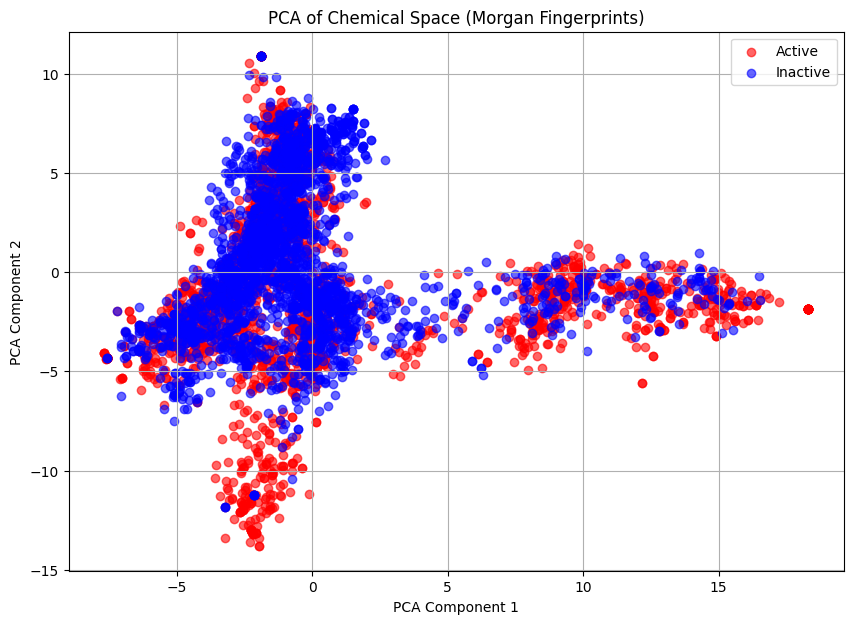

In [91]:
!pip install rdkit-pypi
# prompt: add legend in the PCA graph and improve it

import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem # Importing Chem from rdkit
from rdkit.Chem import AllChem # Importing AllChem from rdkit.Chem
# Import necessary libraries
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.decomposition import PCA # Import PCA

# Load SMILES and activity data
# Assuming a CSV file with 'SMILES' and 'Activity' columns (0 = inactive, 1 = active)
df = combined

# Generate Morgan fingerprints (also known as circular fingerprints) for each compound
def get_morgan_fingerprint(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
        return fingerprint
    else:
        return None

# Compute fingerprints for all compounds
fingerprints = [get_morgan_fingerprint(smiles) for smiles in df['Smiles']]

# Filter out None (invalid SMILES) entries
valid_indices = [i for i, fp in enumerate(fingerprints) if fp is not None]
fingerprints = [fingerprints[i] for i in valid_indices]
df_valid = df.iloc[valid_indices]

# Convert fingerprints to numpy array for PCA
def fingerprints_to_array(fingerprints):
    arr = []
    for fp in fingerprints:
        arr.append(np.array(list(fp.ToBitString()), dtype=int))
    return np.array(arr)

fingerprints_array = fingerprints_to_array(fingerprints)

# Perform PCA for dimensionality reduction
scaler = StandardScaler()
fingerprints_scaled = scaler.fit_transform(fingerprints_array)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(fingerprints_scaled)

# Add PCA results to the dataframe for plotting
df_valid['PCA1'] = pca_result[:, 0]
df_valid['PCA2'] = pca_result[:, 1]

# Plot the PCA results and color by activity (0 = inactive, 1 = active)
plt.figure(figsize=(10, 7))

# Create separate scatter plots for active and inactive compounds
active_indices = df_valid['label'] == 1
inactive_indices = df_valid['label'] == 0

plt.scatter(df_valid['PCA1'][active_indices], df_valid['PCA2'][active_indices], c='red', alpha=0.6, label='Active')
plt.scatter(df_valid['PCA1'][inactive_indices], df_valid['PCA2'][inactive_indices], c='blue', alpha=0.6, label='Inactive')

plt.title('PCA of Chemical Space (Morgan Fingerprints)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend()  # Add the legend
plt.show()

# Optional: Save PCA results to CSV
df_valid[['Smiles', 'label', 'PCA1', 'PCA2']].to_csv('pca_results.csv', index=False)

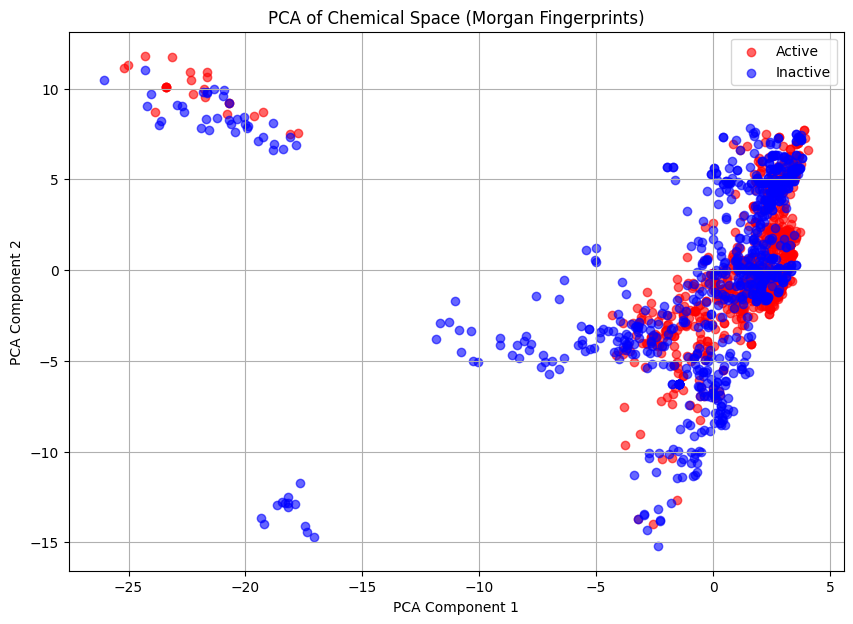

In [93]:
# prompt: apply the above for combined2

# The following code was already present and is being reused here for combined2
# Chemical exploration

# Import necessary libraries (already imported in the original code)

# Load SMILES and activity data
df = combined2

# Generate Morgan fingerprints (already defined in the original code)

# Compute fingerprints for all compounds (already defined in the original code)
fingerprints = [get_morgan_fingerprint(smiles) for smiles in df['Smiles']]

# Filter out None (invalid SMILES) entries (already defined in the original code)
valid_indices = [i for i, fp in enumerate(fingerprints) if fp is not None]
fingerprints = [fingerprints[i] for i in valid_indices]
df_valid = df.iloc[valid_indices]

# Convert fingerprints to numpy array for PCA (already defined in the original code)
fingerprints_array = fingerprints_to_array(fingerprints)

# Perform PCA for dimensionality reduction (already defined in the original code)
scaler = StandardScaler()
fingerprints_scaled = scaler.fit_transform(fingerprints_array)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(fingerprints_scaled)

# Add PCA results to the dataframe for plotting (already defined in the original code)
df_valid['PCA1'] = pca_result[:, 0]
df_valid['PCA2'] = pca_result[:, 1]

# Plot the PCA results and color by activity (0 = inactive, 1 = active)
plt.figure(figsize=(10, 7))

# Create separate scatter plots for active and inactive compounds
active_indices = df_valid['label'] == 1
inactive_indices = df_valid['label'] == 0

plt.scatter(df_valid['PCA1'][active_indices], df_valid['PCA2'][active_indices], c='red', alpha=0.6, label='Active')
plt.scatter(df_valid['PCA1'][inactive_indices], df_valid['PCA2'][inactive_indices], c='blue', alpha=0.6, label='Inactive')

plt.title('PCA of Chemical Space (Morgan Fingerprints)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend()  # Add the legend
plt.show()

# Optional: Save PCA results to CSV
df_valid[['Smiles', 'label', 'PCA1', 'PCA2']].to_csv('pca_results_sglt2.csv', index=False) # Change the filename

Phycochemistry prop


In [94]:
df = combined
df

Molecule ChEMBL ID                                             Smiles  \
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
17         CHEMBL201268             N#C[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccccc1   
18        CHEMBL3697947  N[C@H]1C[C@@H](N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)...   
...                 ...                                                ...   
7271       CHEMBL288114                            O=C(O)c1cc(O)c(O)c(O)c1   
7272       CHEMBL257839  OC[C@H]1O[C@@H](Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc...   
7273           CHEMBL44               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7274       CHEMBL275638                        O=c1cc(-c2ccccc2)oc2ccccc12   
7275          CHEMBL151            O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12   

     Standard Type  Standard Value Standard Relation Standard Units  label  
2             IC50             4.1               '='             nM      1  
3             IC50            27.0               '='             nM      1  
4             IC50            11.5               '='             nM      1  
17            IC50            27.0               '='             nM      1  
18            IC50             2.9               '='             nM      1  
...            ...             ...               ...            ...    ...  
7271          IC50          4650.0               '='             nM      0  
7272          IC50           420.0               '='             nM      0  
7273          IC50           480.0               '='             nM      0  
7274          IC50           170.0               '='             nM      0  
7275          IC50           120.0               '='             nM      0  

[4918 rows x 7 columns]

In [95]:
df2 = combined2
df2

Molecule ChEMBL ID                                             Smiles  \
0         CHEMBL3109014  OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...   
8         CHEMBL1085769  CCCCCCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[...   
13        CHEMBL3639552  CCOc1ccc(Cc2cc([C@]34OC[C@](COC(C)=O)(O3)[C@@H...   
14         CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   
17        CHEMBL1642516  O[C@@H]1[C@@H](O)[C@H](c2ccc(Cl)c(Cc3ncc(-c4cc...   
...                 ...                                                ...   
1977      CHEMBL3960449  Cc1[nH]nc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[...   
1987      CHEMBL3923809  CCOc1ccc(Cc2c(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H]...   
1995       CHEMBL334384               O=C(/C=C/c1ccc(F)cc1)c1c(O)cc(O)cc1O   
2000       CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   
2016       CHEMBL245067  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   

     Standard Type  Standard Value Standard Relation Standard Units  label  
0             IC50           11.00               '='             nM      1  
8             IC50           17.30               '='             nM      1  
13            IC50            5.00               '='             nM      1  
14            IC50           16.00               '='             nM      1  
17            IC50            9.55               '='             nM      1  
...            ...             ...               ...            ...    ...  
1977          IC50          181.00               '='             nM      0  
1987          IC50          185.00               '='             nM      0  
1995          IC50        51700.00               '='             nM      0  
2000          IC50          160.00               '='             nM      0  
2016          IC50           34.60               '='             nM      0  

[1586 rows x 7 columns]

Dppiv

In [96]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
import pandas as pd

# Load your dataset
# Assuming you have a CSV with SMILES strings
df = combined

# Define a function to compute desired properties
def compute_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = rdMolDescriptors.CalcNumHBD(mol)
    hba = rdMolDescriptors.CalcNumHBA(mol)
    tpsa = rdMolDescriptors.CalcTPSA(mol)

    return mw, logp, hbd, hba, tpsa

# Apply the function to the SMILES column and expand results into separate columns
df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']] = df['Smiles'].apply(compute_properties).apply(pd.Series)

# Example: Filter and analyze trends for active and inactive compounds
# Assuming there's a column 'Activity' where 1 signifies active and 0 signifies inactive
active_df = df[df['label'] == 1]
inactive_df = df[df['label'] == 0]

# Summarize or visualize results
print("Active Compounds Summary:")
print(active_df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']].describe())

print("\nInactive Compounds Summary:")
print(inactive_df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']].describe())

# Save the enriched dataframe
df.to_csv('enriched_dataset.csv', index=False)


Active Compounds Summary:
                MW         LogP          HBD          HBA         TPSA
count  2318.000000  2318.000000  2318.000000  2318.000000  2318.000000
mean    413.821009     2.017939     1.603106     5.775237    93.693909
std      92.764272     1.428449     0.834842     1.974142    26.521793
min     169.575000    -3.449230     0.000000     2.000000    29.260000
25%     352.451000     1.157980     1.000000     4.000000    76.360000
50%     413.414500     2.016500     1.000000     6.000000    90.450000
75%     473.569000     2.891515     2.000000     7.000000   108.150000
max     957.089000     9.563720     8.000000    13.000000   298.360000

Inactive Compounds Summary:
                MW         LogP          HBD          HBA         TPSA
count  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000
mean    371.404014     2.215322     1.602692     4.663077    82.724450
std     107.332459     1.525831     0.941249     1.965541    30.558829
min     128.175000    

In [98]:
# prompt: outcome of active compounds summary and inactive summary for Dppiv  in csv file.

# Import necessary libraries
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
import pandas as pd

# Assuming 'combined' DataFrame is already defined
df = combined

# Define a function to compute desired properties
def compute_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = rdMolDescriptors.CalcNumHBD(mol)
    hba = rdMolDescriptors.CalcNumHBA(mol)
    tpsa = rdMolDescriptors.CalcTPSA(mol)

    return mw, logp, hbd, hba, tpsa

# Apply the function to the SMILES column and expand results into separate columns
df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']] = df['Smiles'].apply(compute_properties).apply(pd.Series)

# Filter and analyze trends for active and inactive compounds
# Assuming there's a column 'label' where 1 signifies active and 0 signifies inactive
active_df = df[df['label'] == 1]  # Define active_df here
inactive_df = df[df['label'] == 0] # Define inactive_df here

# Dppiv
active_df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']].describe().to_csv('dppiv_active_summary.csv')
inactive_df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']].describe().to_csv('dppiv_inactive_summary.csv')

Sglt2


In [99]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
import pandas as pd

# Load your dataset
# Assuming you have a CSV with SMILES strings
df2 = combined2

# Define a function to compute desired properties
def compute_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = rdMolDescriptors.CalcNumHBD(mol)
    hba = rdMolDescriptors.CalcNumHBA(mol)
    tpsa = rdMolDescriptors.CalcTPSA(mol)

    return mw, logp, hbd, hba, tpsa

# Apply the function to the SMILES column and expand results into separate columns
df2[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']] = df2['Smiles'].apply(compute_properties).apply(pd.Series)

# Example: Filter and analyze trends for active and inactive compounds
# Assuming there's a column 'Activity' where 1 signifies active and 0 signifies inactive
active_df2 = df2[df2['label'] == 1]
inactive_df2 = df2[df2['label'] == 0]

# Summarize or visualize results
print("Active Compounds Summary:")
print(active_df2[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']].describe())

print("\nInactive Compounds Summary:")
print(inactive_df2[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']].describe())

# Save the enriched dataframe
df.to_csv('enriched_dataset2.csv', index=False)

Active Compounds Summary:
               MW        LogP         HBD         HBA        TPSA
count  823.000000  823.000000  823.000000  823.000000  823.000000
mean   450.699429    2.120711    3.941677    6.895504  106.012685
std     46.524202    0.935728    1.017607    1.155234   18.896380
min    358.434000   -6.013100    0.000000    4.000000   60.250000
25%    418.920500    1.613300    4.000000    6.000000   99.380000
50%    448.943000    2.071220    4.000000    7.000000  102.180000
75%    468.955000    2.577700    4.000000    8.000000  111.425000
max    907.063000    5.901500   10.000000   12.000000  212.200000

Inactive Compounds Summary:
                MW        LogP         HBD         HBA        TPSA
count   763.000000  763.000000  763.000000  763.000000  763.000000
mean    458.509609    1.947344    3.948886    7.634338  118.140066
std      94.865782    1.450868    1.427609    1.535657   28.807240
min     256.257000   -0.878400    0.000000    3.000000   37.790000
25%     408.4510

In [100]:
# prompt: outcome of active compounds summary and inactive summary in csv file

# Save active and inactive compound summaries to CSV files

# Dppiv
active_summary = active_df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']].describe()
inactive_summary = inactive_df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']].describe()

active_summary.to_csv('dppiv_active_summary.csv')
inactive_summary.to_csv('dppiv_inactive_summary.csv')

# Sglt2
active_summary2 = active_df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']].describe()
inactive_summary2 = inactive_df[['MW', 'LogP', 'HBD', 'HBA', 'TPSA']].describe()

active_summary2.to_csv('sglt2_active_summary.csv')
inactive_summary2.to_csv('sglt2_inactive_summary.csv')

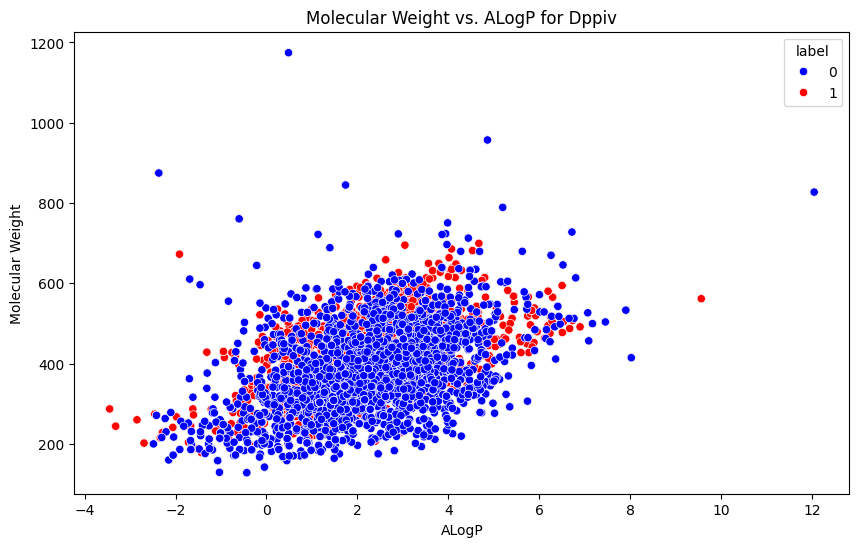

In [101]:
# prompt:  visualization of the MW chemical space as a function of ALogP
import seaborn as sns  # Import the seaborn library
import matplotlib.pyplot as plt

# Visualization of MW vs. ALogP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LogP', y='MW', hue='label', data=df, palette=['blue', 'red'])
plt.title('Molecular Weight vs. ALogP for Dppiv')
plt.xlabel('ALogP')
plt.ylabel('Molecular Weight')
plt.show()

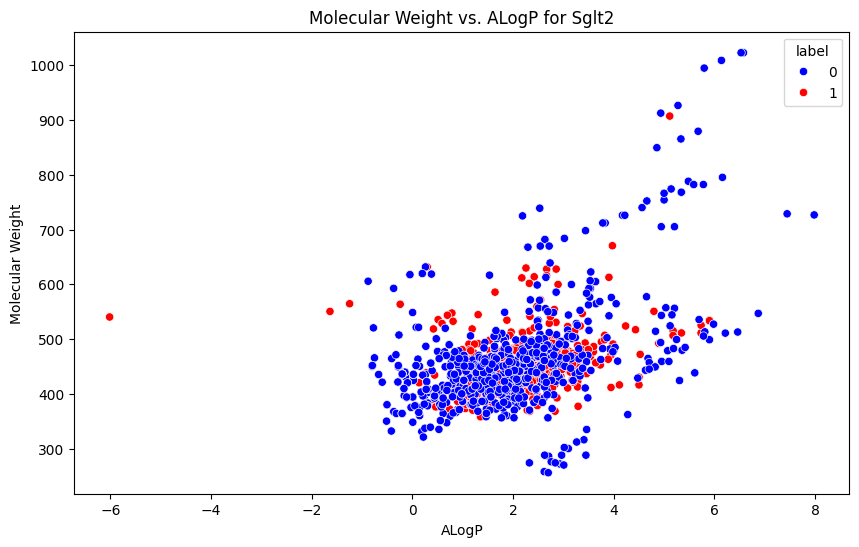

In [102]:
# prompt:  visualization of the MW chemical space as a function of ALogP

# Visualization of MW vs. ALogP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LogP', y='MW', hue='label', data=df2, palette=['blue', 'red'])
plt.title('Molecular Weight vs. ALogP for Sglt2')
plt.xlabel('ALogP')
plt.ylabel('Molecular Weight')
plt.show()

Dppiv

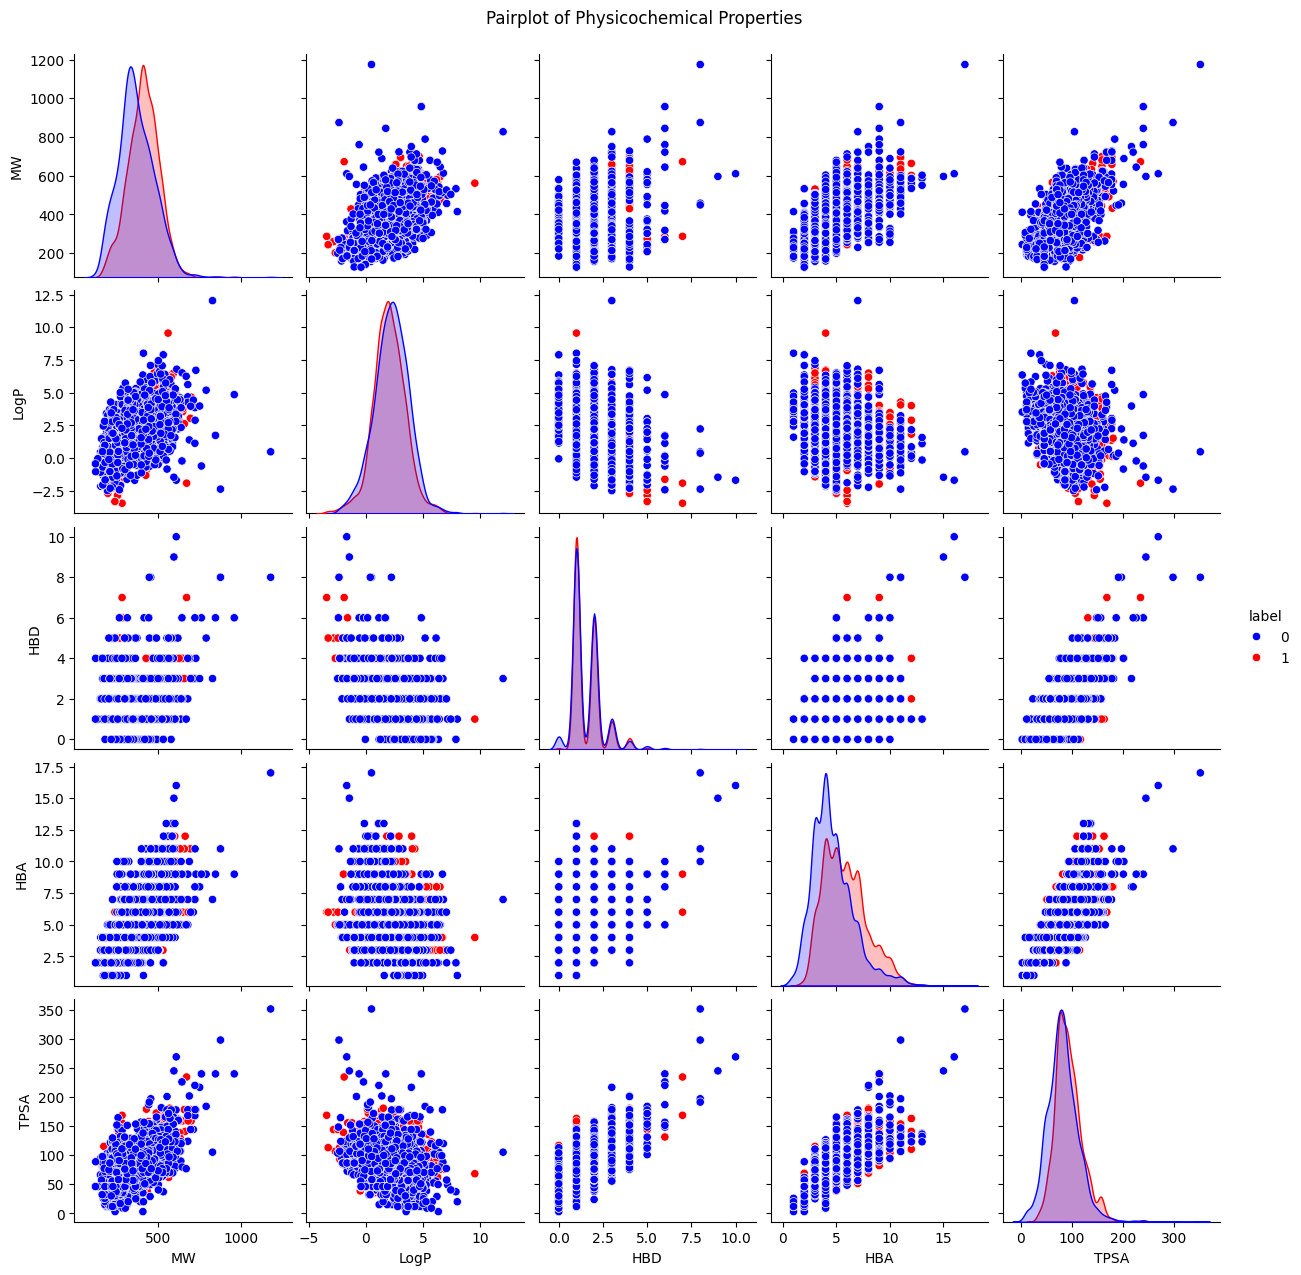

<ipython-input-104-1a6722cc8c97>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='MW', data=df, palette=['blue', 'red'])
<ipython-input-104-1a6722cc8c97>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='LogP', data=df, palette=['blue', 'red'])
<ipython-input-104-1a6722cc8c97>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='HBD', data=df, palette=['blue', 'red'])
<ipython-input-104-1a6722cc8c97>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

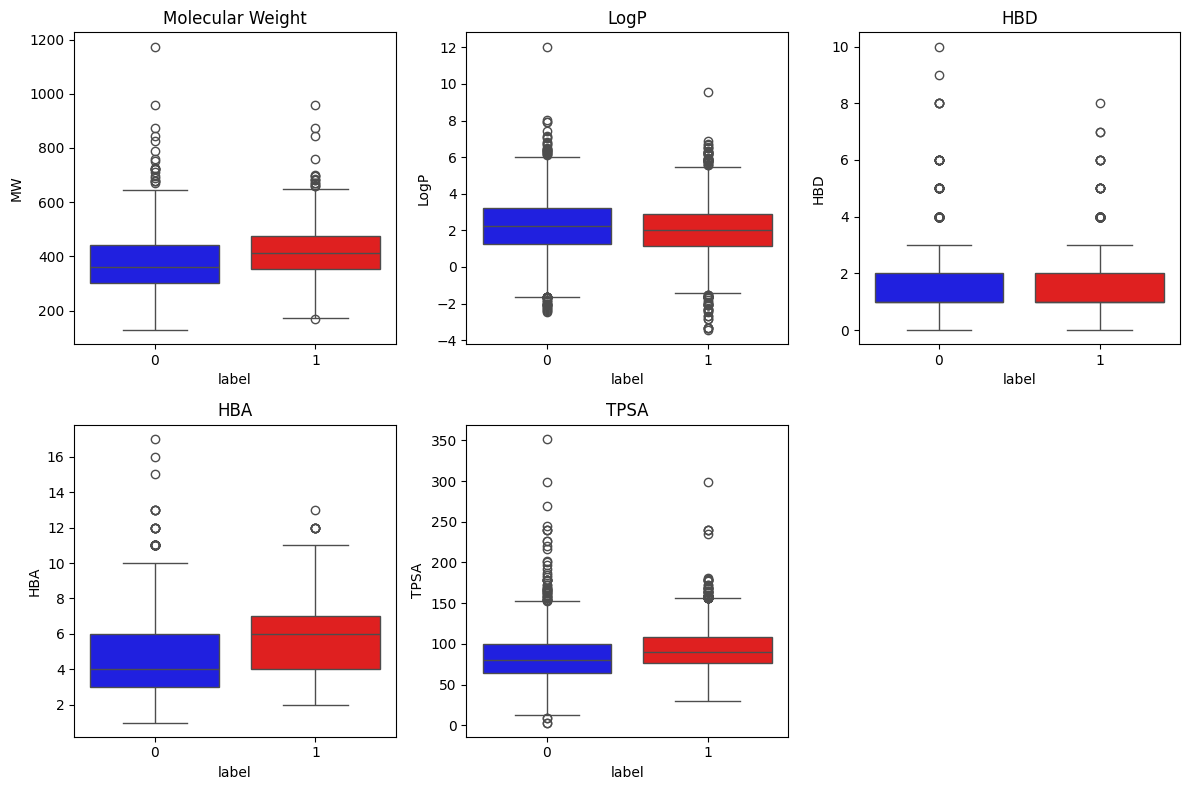

In [104]:
# prompt: nice visualization

# Assuming df contains the necessary columns ('MW', 'LogP', 'HBD', 'HBA', 'TPSA', 'label')

# Create a pairplot to visualize relationships between properties, colored by activity
sns.pairplot(df, vars=['MW', 'LogP', 'HBD', 'HBA', 'TPSA'], hue='label', palette=['blue', 'red'])
plt.suptitle('Pairplot of Physicochemical Properties', y=1.02) # Adjust y position for better placement
plt.show()


# Box plots for each property, grouped by activity
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x='label', y='MW', data=df, palette=['blue', 'red'])
plt.title('Molecular Weight')

plt.subplot(2, 3, 2)
sns.boxplot(x='label', y='LogP', data=df, palette=['blue', 'red'])
plt.title('LogP')

plt.subplot(2, 3, 3)
sns.boxplot(x='label', y='HBD', data=df, palette=['blue', 'red'])
plt.title('HBD')

plt.subplot(2, 3, 4)
sns.boxplot(x='label', y='HBA', data=df, palette=['blue', 'red'])
plt.title('HBA')

plt.subplot(2, 3, 5)
sns.boxplot(x='label', y='TPSA', data=df, palette=['blue', 'red'])
plt.title('TPSA')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Sglt2

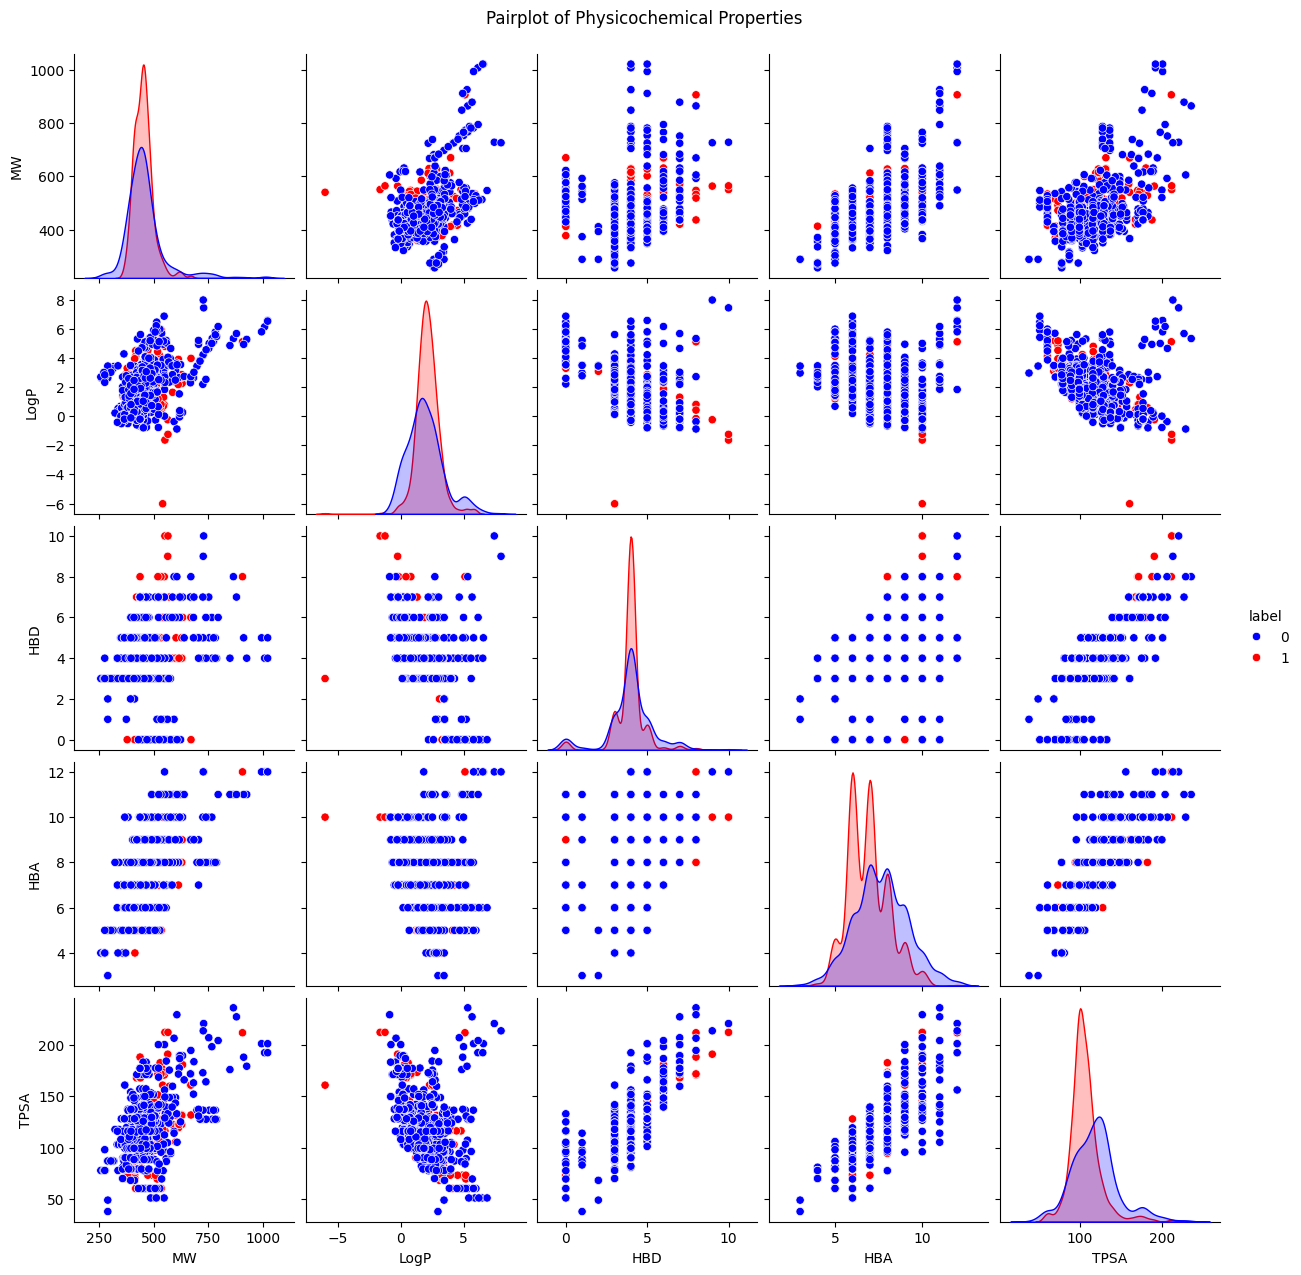

<ipython-input-106-5d2dba1747bb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='MW', data=df, palette=['blue', 'red'])
<ipython-input-106-5d2dba1747bb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='LogP', data=df, palette=['blue', 'red'])
<ipython-input-106-5d2dba1747bb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='HBD', data=df, palette=['blue', 'red'])
<ipython-input-106-5d2dba1747bb>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

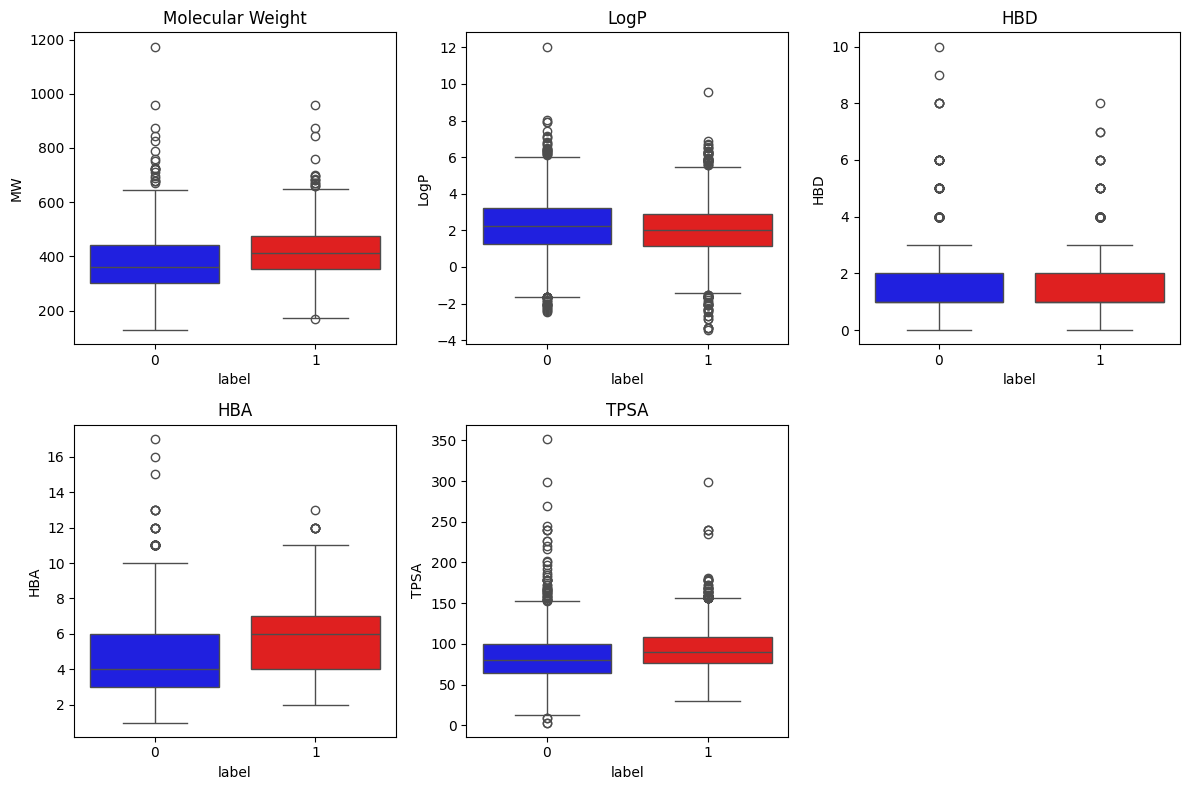

In [106]:
# prompt: nice visualization

# Assuming df contains the necessary columns ('MW', 'LogP', 'HBD', 'HBA', 'TPSA', 'label')

# Create a pairplot to visualize relationships between properties, colored by activity
sns.pairplot(df2, vars=['MW', 'LogP', 'HBD', 'HBA', 'TPSA'], hue='label', palette=['blue', 'red'])
plt.suptitle('Pairplot of Physicochemical Properties', y=1.02) # Adjust y position for better placement
plt.show()


# Box plots for each property, grouped by activity
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x='label', y='MW', data=df, palette=['blue', 'red'])
plt.title('Molecular Weight')

plt.subplot(2, 3, 2)
sns.boxplot(x='label', y='LogP', data=df, palette=['blue', 'red'])
plt.title('LogP')

plt.subplot(2, 3, 3)
sns.boxplot(x='label', y='HBD', data=df, palette=['blue', 'red'])
plt.title('HBD')

plt.subplot(2, 3, 4)
sns.boxplot(x='label', y='HBA', data=df, palette=['blue', 'red'])
plt.title('HBA')

plt.subplot(2, 3, 5)
sns.boxplot(x='label', y='TPSA', data=df, palette=['blue', 'red'])
plt.title('TPSA')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [107]:
!pip install rdkit-pypi --upgrade  # Upgrade to the latest RDKit version
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold  # Import MurckoScaffold explicitly

def bemis_murcko_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol))  # Use MurckoScaffold directly
    else:
        return None

# Apply the function to your dataframes
combined['Bemis_Murcko_Scaffold'] = combined['Smiles'].apply(bemis_murcko_scaffold)
combined2['Bemis_Murcko_Scaffold'] = combined2['Smiles'].apply(bemis_murcko_scaffold)

In [108]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold  # Import MurckoScaffold explicitly

def bemis_murcko_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol))  # Use MurckoScaffold directly
    else:
        return None

# Apply the function to your dataframes
combined['Bemis_Murcko_Scaffold'] = combined['Smiles'].apply(bemis_murcko_scaffold)
combined2['Bemis_Murcko_Scaffold'] = combined2['Smiles'].apply(bemis_murcko_scaffold)

In [109]:
# prompt: print Bemis Murcko scaffold reslults and draw their structure

from rdkit.Chem import Draw

# Function to draw Bemis-Murcko scaffolds
from rdkit.Chem import Draw

# Function to draw Bemis-Murcko scaffolds
def draw_scaffolds(df, num_scaffolds=5):
    scaffolds = df['Bemis_Murcko_Scaffold'].unique()[:num_scaffolds]
    mols = [Chem.MolFromSmiles(scaffold) for scaffold in scaffolds]
    # Convert scaffolds to a list to avoid ambiguity in the 'legends' parameter
    legends = list(scaffolds)
    return Draw.MolsToGridImage(mols, legends=legends, molsPerRow=min(num_scaffolds, 5))


# Draw Bemis-Murcko scaffolds for combined
image_combined = draw_scaffolds(combined)
image_combined

# Print Bemis-Murcko scaffolds for combined
print("Bemis-Murcko Scaffolds for combined:")
print(combined['Bemis_Murcko_Scaffold'].value_counts())


# Draw Bemis-Murcko scaffolds for combined2
image_combined2 = draw_scaffolds(combined2)
image_combined2

# Print Bemis-Murcko scaffolds for combined2
print("\nBemis-Murcko Scaffolds for combined2:")
print(combined2['Bemis_Murcko_Scaffold'].value_counts())

Bemis-Murcko Scaffolds for combined:
Bemis_Murcko_Scaffold
C1CCNC1                                                           198
O=C(CCCc1ccccc1)N1CCn2cnnc2C1                                     129
O=C(CCc1ccccc1)N1CCCC1                                             74
O=C(NCC(=O)N1CCCC1)c1ccnc2ccccc12                                  65
O=C(CCc1ccc(-c2ccccc2)cc1)N1CCCC1                                  57
                                                                 ... 
c1ncc2nc[nH]c2n1                                                    1
O=C(N[C@@H](Cc1ccccc1)C(=O)N1CCCC1)OCc1ccccc1                       1
O=S(=O)(c1ccccc1)c1n[nH]c2c1CN([C@@H]1CC[C@@H](c3ccccc3)OC1)C2      1
c1ccc([C@H]2CC[C@H](N3Cc4cnc5ncnn5c4C3)CC2)cc1                      1
O=c1c(-c2ccccc2)coc2ccccc12                                         1
Name: count, Length: 1646, dtype: int64

Bemis-Murcko Scaffolds for combined2:
Bemis_Murcko_Scaffold
c1ccc(Cc2cccc([C@H]3CCCCO3)c2)cc1                  155
c1ccc(Cc2c[nH]n

In [110]:
# prompt: save the Scaffolds outcome in excell

# Save the Scaffolds outcome in excel files

#Dppiv
combined.to_excel('Dppiv_scaffolds.xlsx', index=False)

#Sglt2
combined2.to_excel('Sglt2_scaffolds.xlsx', index=False)


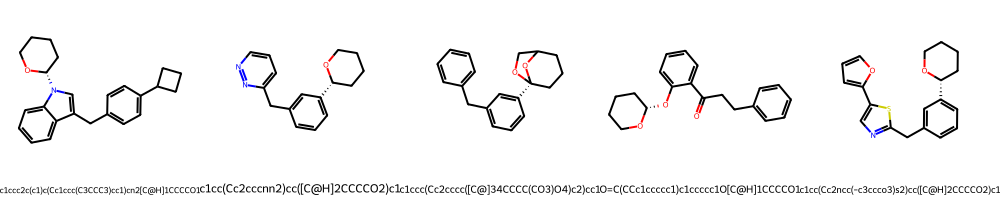

In [111]:
image_combined2

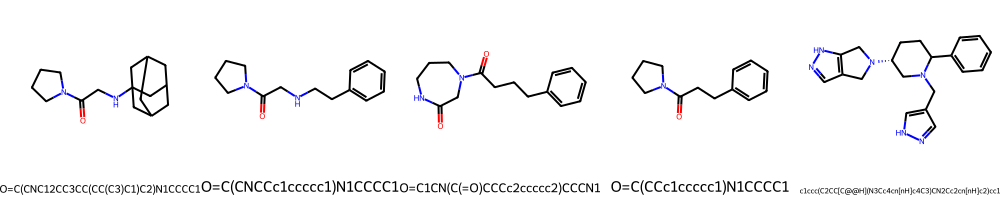

In [112]:
image_combined

In [113]:
# prompt: for combined 2 perform the Bemis_Murcko_Scaffold for active and inactive compounds

# Assuming combined and combined2 dataframes are already defined and populated.

from rdkit.Chem.Scaffolds import MurckoScaffold

def bemis_murcko_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol))
    else:
        return None

# Apply the function to your dataframes
combined['Bemis_Murcko_Scaffold'] = combined['Smiles'].apply(bemis_murcko_scaffold)
combined2['Bemis_Murcko_Scaffold'] = combined2['Smiles'].apply(bemis_murcko_scaffold)

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

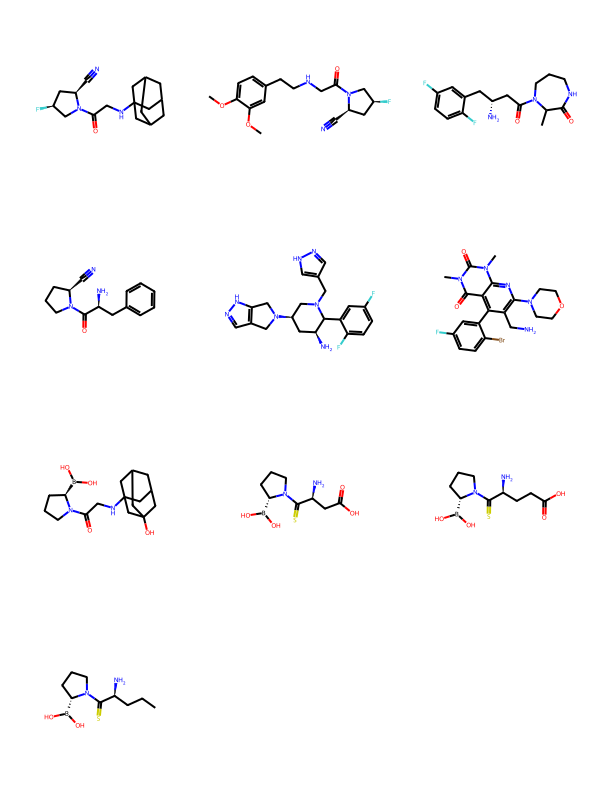

In [114]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in combined['Smiles'].iloc[0:10]])

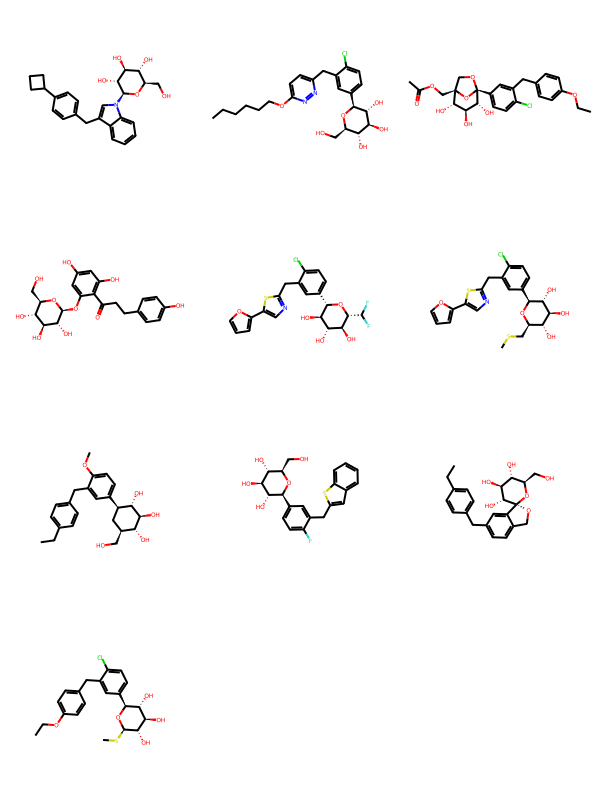

In [115]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in combined2['Smiles'].iloc[0:10]])

In [ ]:
# prompt: perform some analysis in the chemical structure

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski

# Function to calculate molecular properties
def calculate_properties(smiles):
  mol = Chem.MolFromSmiles(smiles)
  if mol is not None:
    molecular_weight = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    num_h_donors = Lipinski.NumHDonors(mol)
    num_h_acceptors = Lipinski.NumHAcceptors(mol)
    return molecular_weight, logp, num_h_donors, num_h_acceptors
  else:
    return None, None, None, None

# Apply the function to the 'Smiles' column
combined['Molecular Weight'], combined['LogP'], combined['NumHDonors'], combined['NumHAcceptors'] = zip(*combined['Smiles'].apply(calculate_properties))

# Print the first few rows with the calculated properties
print(combined[['Smiles', 'Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors']].head())

# You can perform further analysis based on these properties,
# such as calculating the distribution of molecular weights,
# identifying compounds with specific properties, or
# creating visualizations to understand the data better.


                                              Smiles  Molecular Weight  \
0  N[C@H](C(=O)N1CCCC1)[C@H]1CC[C@H](NS(=O)(=O)c2...           401.479   
2  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2           305.397   
3      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC           335.379   
4          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F           325.359   
5  C[C@@H](c1ccc(-c2ccc(F)cc2)cc1)[C@H](N)C(=O)N1...           458.427   

      LogP  NumHDonors  NumHAcceptors  
0  1.75160           2              4  
2  2.00738           1              3  
3  1.29848           1              5  
4  0.96170           2              3  
5  4.12720           2              3  


In [ ]:
active['Molecular Weight'], active['LogP'], active['NumHDonors'], active['NumHAcceptors'] = zip(*active['Smiles'].apply(calculate_properties))
inactive['Molecular Weight'], inactive['LogP'], inactive['NumHDonors'], inactive['NumHAcceptors'] = zip(*inactive['Smiles'].apply(calculate_properties))

In [117]:
# prompt: The statistical analysis
# computed through the Mann–Whitney U test

from scipy.stats import mannwhitneyu
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski # Make sure Lipinski is imported

# Assuming 'active' and 'inactive' DataFrames are defined as in your previous code
# ... (your existing code for data loading and preprocessing)

# Calculate properties for active and inactive dataframes
# Function to calculate molecular properties (assuming it's defined as before)
def calculate_properties(smiles):
  mol = Chem.MolFromSmiles(smiles)
  if mol is not None:
    molecular_weight = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    num_h_donors = Lipinski.NumHDonors(mol) # Use Lipinski.NumHDonors to call the function
    num_h_acceptors = Lipinski.NumHAcceptors(mol) # Use Lipinski.NumHAcceptors to call the function
    return molecular_weight, logp, num_h_donors, num_h_acceptors
  else:
    return None, None, None, None

active['Molecular Weight'], active['LogP'], active['NumHDonors'], active['NumHAcceptors'] = zip(*active['Smiles'].apply(calculate_properties))
inactive['Molecular Weight'], inactive['LogP'], inactive['NumHDonors'], inactive['NumHAcceptors'] = zip(*inactive['Smiles'].apply(calculate_properties))


# Example: Mann-Whitney U test for Molecular Weight
statistic, p_value = mannwhitneyu(active['Molecular Weight'], inactive['Molecular Weight'], alternative='two-sided')

print(f"Mann-Whitney U test for Molecular Weight:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a statistically significant difference in Molecular Weight between active and inactive compounds.")
else:
    print("There is no statistically significant difference in Molecular Weight between active and inactive compounds.")

# Perform Mann-Whitney U test for other properties (LogP, NumHDonors, NumHAcceptors)
properties = ['LogP', 'NumHDonors', 'NumHAcceptors']
for prop in properties:
    statistic, p_value = mannwhitneyu(active[prop], inactive[prop], alternative='two-sided')
    print(f"\nMann-Whitney U test for {prop}:")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")
    if p_value < alpha:
        print(f"There is a statistically significant difference in {prop} between active and inactive compounds.")
    else:
        print(f"There is no statistically significant difference in {prop} between active and inactive compounds.")

Mann-Whitney U test for Molecular Weight:
Statistic: 3801015.5
P-value: 1.494728345324358e-56
There is a statistically significant difference in Molecular Weight between active and inactive compounds.

Mann-Whitney U test for LogP:
Statistic: 2749146.0
P-value: 1.0574971312565975e-07
There is a statistically significant difference in LogP between active and inactive compounds.

Mann-Whitney U test for NumHDonors:
Statistic: 3030838.0
P-value: 0.6972483726644327
There is no statistically significant difference in NumHDonors between active and inactive compounds.

Mann-Whitney U test for NumHAcceptors:
Statistic: 4019603.0
P-value: 1.2730697470180736e-93
There is a statistically significant difference in NumHAcceptors between active and inactive compounds.


In [118]:
# prompt: perform some analysis in the chemical structure

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski

# Function to calculate molecular properties
def calculate_properties(smiles):
  mol = Chem.MolFromSmiles(smiles)
  if mol is not None:
    molecular_weight = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    num_h_donors = Lipinski.NumHDonors(mol)
    num_h_acceptors = Lipinski.NumHAcceptors(mol)
    return molecular_weight, logp, num_h_donors, num_h_acceptors
  else:
    return None, None, None, None

# Apply the function to the 'Smiles' column
combined2['Molecular Weight'], combined2['LogP'], combined2['NumHDonors'], combined2['NumHAcceptors'] = zip(*combined2['Smiles'].apply(calculate_properties))

# Print the first few rows with the calculated properties
print(combined2[['Smiles', 'Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors']].head())

# You can perform further analysis based on these properties,
# such as calculating the distribution of molecular weights,
# identifying compounds with specific properties, or
# creating visualizations to understand the data better.


                                               Smiles  Molecular Weight  \
0   OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...           423.509   
8   CCCCCCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[...           466.962   
13  CCOc1ccc(Cc2cc([C@]34OC[C@](COC(C)=O)(O3)[C@@H...           478.925   
14  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...           436.413   
17  O[C@@H]1[C@@H](O)[C@H](c2ccc(Cl)c(Cc3ncc(-c4cc...           457.882   

      LogP  NumHDonors  NumHAcceptors  
0   2.4720           4              6  
8   2.1948           4              8  
13  1.9273           3              8  
14 -0.2024           7             10  
17  3.4350           3              7  


In [119]:
# prompt: The statistical analysis through the Mann–Whitney U test for combined2

# Assuming 'combined2' DataFrame is already loaded and preprocessed as in your original code.
# Assuming 'active' and 'inactive' DataFrames are created from 'combined2' based on 'label' column
active = combined2[combined2['label'] == 1]
inactive = combined2[combined2['label'] == 0]

# Function to calculate molecular properties (if not already defined)
def calculate_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        molecular_weight = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        num_h_donors = Lipinski.NumHDonors(mol)
        num_h_acceptors = Lipinski.NumHAcceptors(mol)
        return molecular_weight, logp, num_h_donors, num_h_acceptors
    else:
        return None, None, None, None

# Apply the function to the 'Smiles' column for combined2 DataFrame (if not already done)
combined2['Molecular Weight'], combined2['LogP'], combined2['NumHDonors'], combined2['NumHAcceptors'] = zip(*combined2['Smiles'].apply(calculate_properties))

# Recalculate properties for active and inactive sets from the updated combined2
active['Molecular Weight'], active['LogP'], active['NumHDonors'], active['NumHAcceptors'] = zip(*active['Smiles'].apply(calculate_properties))
inactive['Molecular Weight'], inactive['LogP'], inactive['NumHDonors'], inactive['NumHAcceptors'] = zip(*inactive['Smiles'].apply(calculate_properties))

# Perform Mann-Whitney U test for each property
properties = ['Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors']
for prop in properties:
    statistic, p_value = mannwhitneyu(active[prop].dropna(), inactive[prop].dropna(), alternative='two-sided')  # Drop NA values
    print(f"\nMann-Whitney U test for {prop} (combined2):")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print(f"There is a statistically significant difference in {prop} between active and inactive compounds.")
    else:
        print(f"There is no statistically significant difference in {prop} between active and inactive compounds.")

<ipython-input-119-f18a8a24f42d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active['Molecular Weight'], active['LogP'], active['NumHDonors'], active['NumHAcceptors'] = zip(*active['Smiles'].apply(calculate_properties))



Mann-Whitney U test for Molecular Weight (combined2):
Statistic: 328575.0
P-value: 0.10912626316531396
There is no statistically significant difference in Molecular Weight between active and inactive compounds.

Mann-Whitney U test for LogP (combined2):
Statistic: 360524.5
P-value: 3.254218412599314e-07
There is a statistically significant difference in LogP between active and inactive compounds.

Mann-Whitney U test for NumHDonors (combined2):
Statistic: 304601.0
P-value: 0.2352876938773386
There is no statistically significant difference in NumHDonors between active and inactive compounds.

Mann-Whitney U test for NumHAcceptors (combined2):
Statistic: 218512.0
P-value: 5.926842673911402e-27
There is a statistically significant difference in NumHAcceptors between active and inactive compounds.


<ipython-input-119-f18a8a24f42d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive['Molecular Weight'], inactive['LogP'], inactive['NumHDonors'], inactive['NumHAcceptors'] = zip(*inactive['Smiles'].apply(calculate_properties))


In [121]:
# prompt: four descriptors
# –ARR, nCIC, RBN, and nBnz

# Assuming 'combined' DataFrame is already loaded and contains the 'Smiles' column
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski # Import Lipinski or Descriptors for CalcNumCycles

# Function to calculate additional molecular properties
def calculate_more_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Calculate descriptors
        arr = Descriptors.NumAromaticRings(mol)
        nCIC = Lipinski.RingCount(mol)  # Use Lipinski.RingCount or Descriptors.NumRings instead of rdMolDescriptors.CalcNumCycles
        RBN = Lipinski.NumRotatableBonds(mol)
        nBnz = Descriptors.NumAromaticRings(mol)

        return arr, nCIC, RBN, nBnz
    else:
        return None, None, None, None

# Apply the function to the 'Smiles' column
combined['ARR'], combined['nCIC'], combined['RBN'], combined['nBnz'] = zip(*combined['Smiles'].apply(calculate_more_properties))

# Print the first few rows with the calculated properties
print(combined[['Smiles', 'ARR', 'nCIC', 'RBN', 'nBnz']].head())

                                               Smiles  ARR  nCIC  RBN  nBnz
2   N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2    0     5    3     0
3       COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC    1     2    7     1
4           CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F    1     2    4     1
17             N#C[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccccc1    1     2    3     1
18  N[C@H]1C[C@@H](N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)...    3     5    4     3


Dppiv

<ipython-input-122-68332601a0aa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=prop, data=combined, palette=['blue', 'red'])
<ipython-input-122-68332601a0aa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=prop, data=combined, palette=['blue', 'red'])
<ipython-input-122-68332601a0aa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=prop, data=combined, palette=['blue', 'red'])
<ipython-input-122-68332601a0aa>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

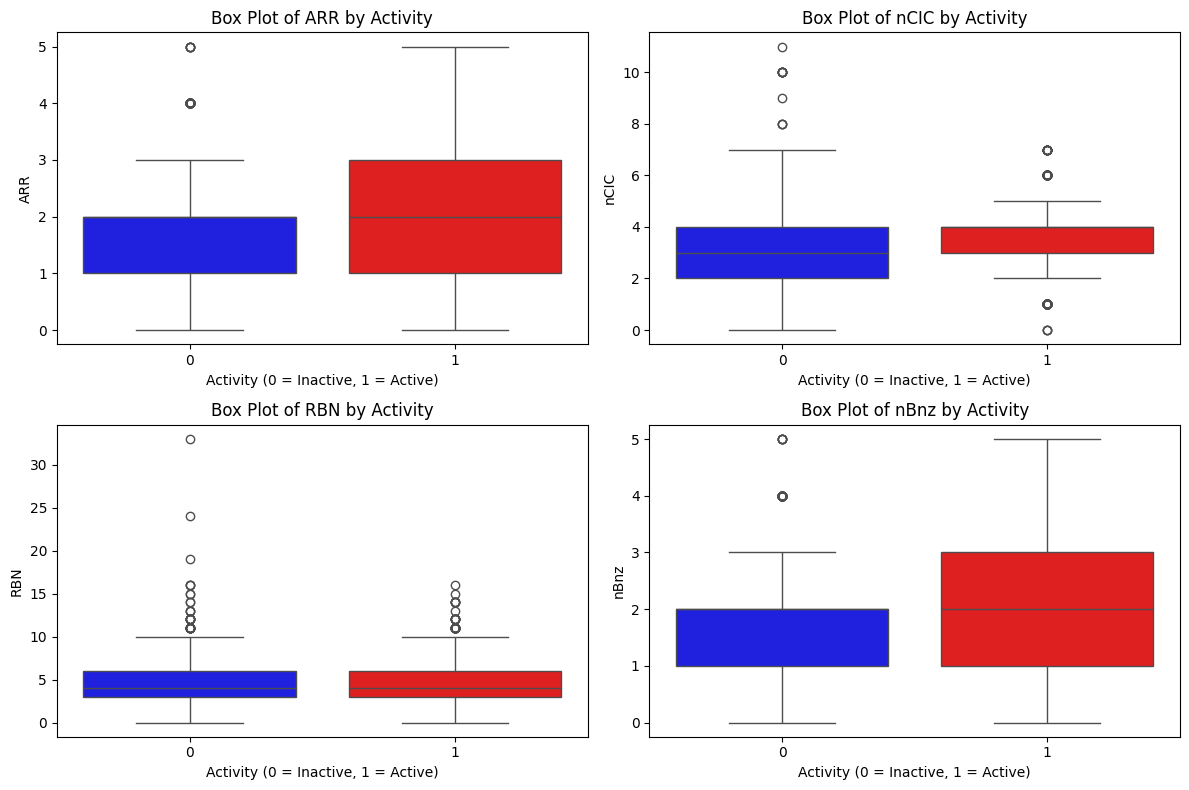

In [122]:
# prompt: display  a box plot of these descriptors :ARR', 'nCIC', 'RBN', 'nBnz for  active and inactive

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined' DataFrame is already loaded and processed as in your previous code.

# Create box plots for 'ARR', 'nCIC', 'RBN', 'nBnz', grouped by activity ('label')
plt.figure(figsize=(12, 8))

properties = ['ARR', 'nCIC', 'RBN', 'nBnz']
for i, prop in enumerate(properties):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='label', y=prop, data=combined, palette=['blue', 'red'])
    plt.title(f'Box Plot of {prop} by Activity')
    plt.ylabel(prop)
    plt.xlabel('Activity (0 = Inactive, 1 = Active)')

plt.tight_layout()
plt.show()

Sglt2

In [123]:
# prompt: four descriptors
# –ARR, nCIC, RBN, and nBnz

# Assuming 'combined' DataFrame is already loaded and contains the 'Smiles' column
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski # Import Lipinski or Descriptors for CalcNumCycles

# Function to calculate additional molecular properties
def calculate_more_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Calculate descriptors
        arr = Descriptors.NumAromaticRings(mol)
        nCIC = Lipinski.RingCount(mol)  # Use Lipinski.RingCount or Descriptors.NumRings instead of rdMolDescriptors.CalcNumCycles
        RBN = Lipinski.NumRotatableBonds(mol)
        nBnz = Descriptors.NumAromaticRings(mol)

        return arr, nCIC, RBN, nBnz
    else:
        return None, None, None, None

# Apply the function to the 'Smiles' column
combined2['ARR'], combined2['nCIC'], combined2['RBN'], combined2['nBnz'] = zip(*combined2['Smiles'].apply(calculate_more_properties))

# Print the first few rows with the calculated properties
print(combined2[['Smiles', 'ARR', 'nCIC', 'RBN', 'nBnz']].head())

                                               Smiles  ARR  nCIC  RBN  nBnz
0   OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...    3     5    5     3
8   CCCCCCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[...    2     3   10     2
13  CCOc1ccc(Cc2cc([C@]34OC[C@](COC(C)=O)(O3)[C@@H...    2     4    7     2
14  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...    2     3    7     2
17  O[C@@H]1[C@@H](O)[C@H](c2ccc(Cl)c(Cc3ncc(-c4cc...    3     4    5     3


<ipython-input-124-3092cadfbe1f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=prop, data=combined2, palette=['blue', 'red'])
<ipython-input-124-3092cadfbe1f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=prop, data=combined2, palette=['blue', 'red'])
<ipython-input-124-3092cadfbe1f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=prop, data=combined2, palette=['blue', 'red'])
<ipython-input-124-3092cadfbe1f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

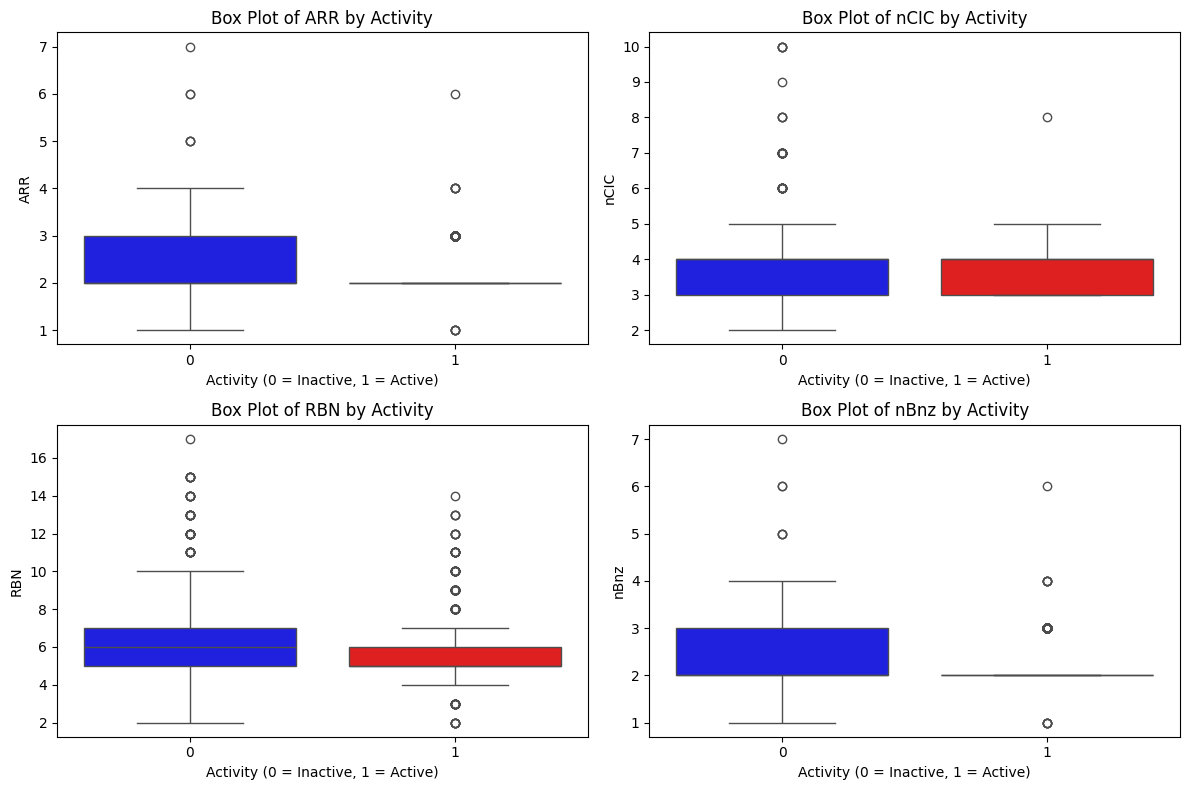

In [124]:
# prompt: display  a box plot of these descriptors :ARR', 'nCIC', 'RBN', 'nBnz for  active and inactive

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined' DataFrame is already loaded and processed as in your previous code.

# Create box plots for 'ARR', 'nCIC', 'RBN', 'nBnz', grouped by activity ('label')
plt.figure(figsize=(12, 8))

properties = ['ARR', 'nCIC', 'RBN', 'nBnz']
for i, prop in enumerate(properties):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='label', y=prop, data=combined2, palette=['blue', 'red'])
    plt.title(f'Box Plot of {prop} by Activity')
    plt.ylabel(prop)
    plt.xlabel('Activity (0 = Inactive, 1 = Active)')

plt.tight_layout()
plt.show()

Dppiv

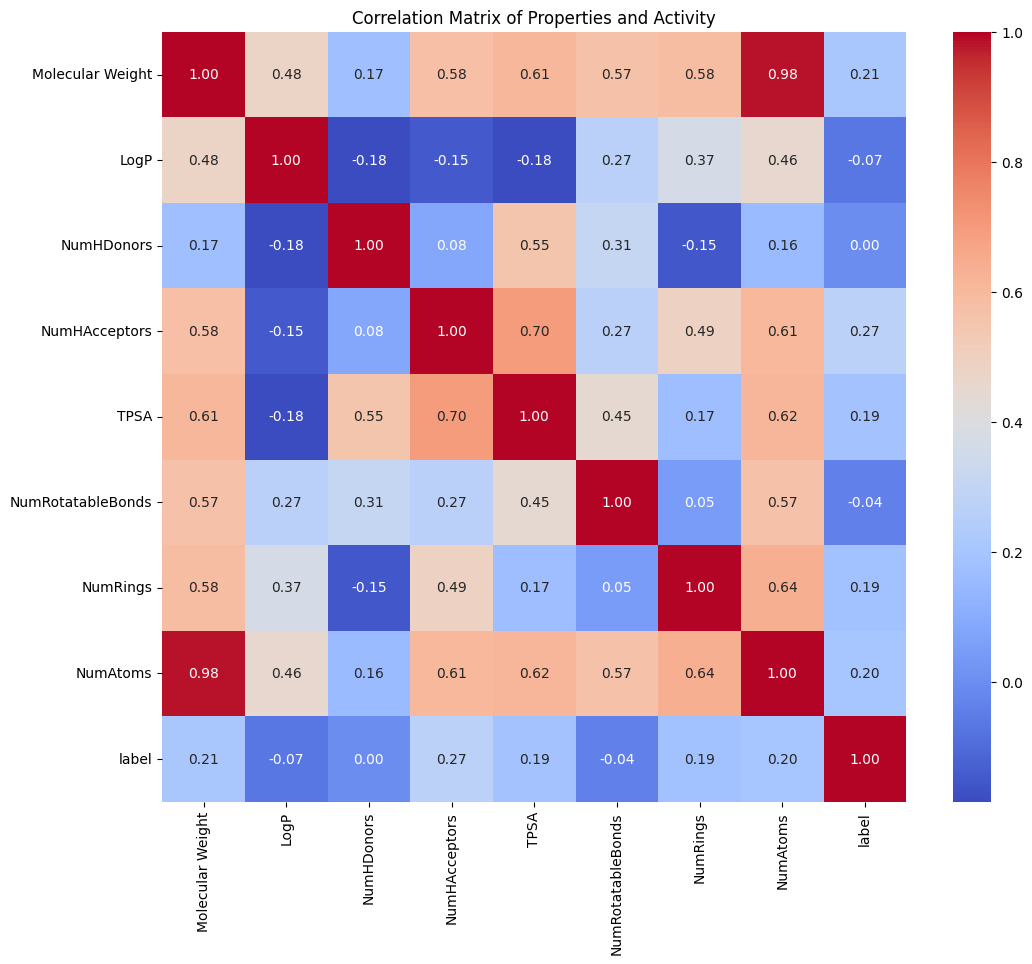

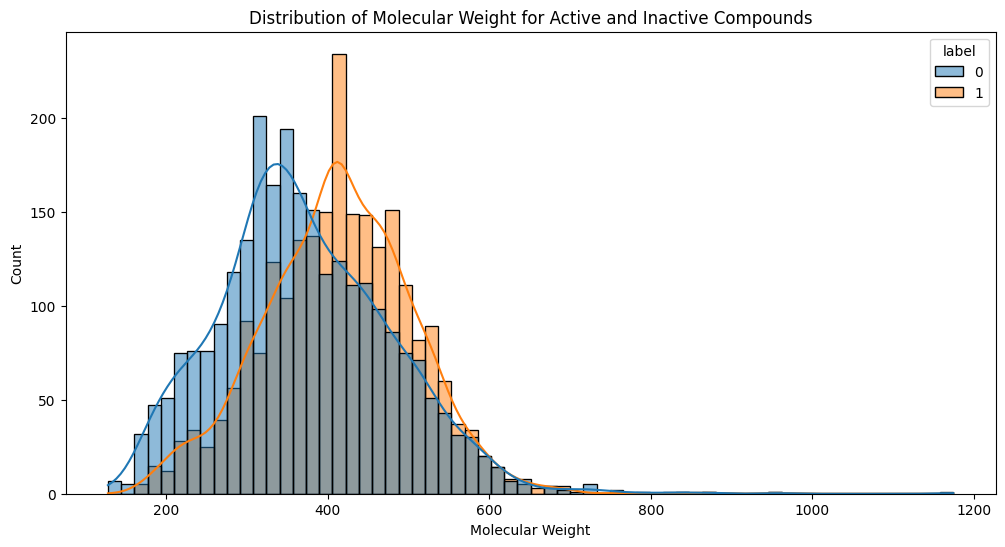

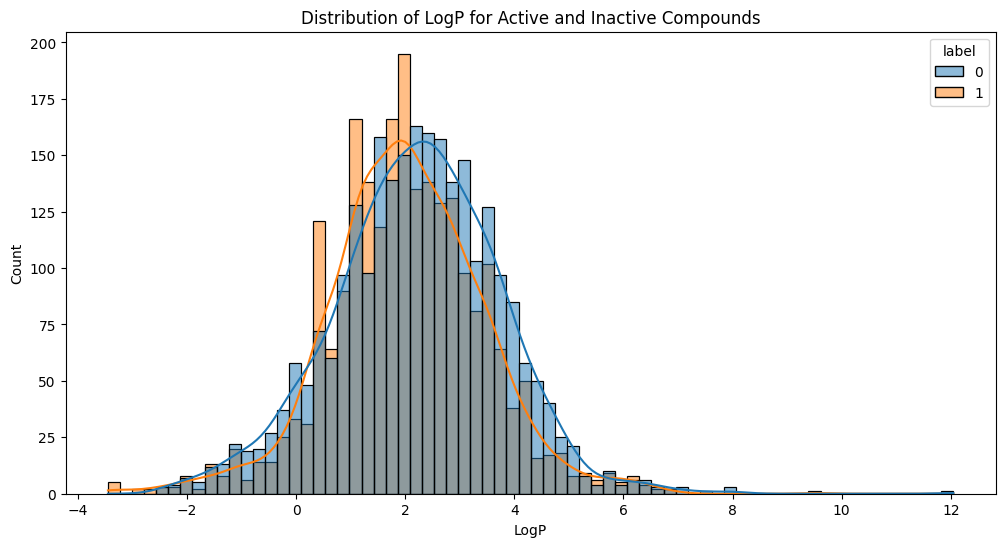

     Molecule ChEMBL ID                                             Smiles  \
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
18        CHEMBL3697947  N[C@H]1C[C@@H](N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)...   
32        CHEMBL1808464   Cc1ccc(-c2c(CN)c(CC(C)C)nc3ccc(OCC(N)=O)cc23)cc1   
33        CHEMBL3215633  CNC(=O)COc1ccc2nc(CC(C)C)c(CN)c(-c3ccc(C)cc3)c...   
34        CHEMBL1808475  CC(C)Cn1c(CN)c(-c2ccccc2)c2cc(OCC(N)=O)ccc2c1=...   
...                 ...                                                ...   
7228      CHEMBL3425748  N[C@@H](CC(=O)N1CC[C@@H]2[C@H](CCc3nnc(C(F)(F)...   
7232      CHEMBL4246951                  Brc1nc2n(n1)CC(c1cc3ccccc3o1)=NN2   
7273           CHEMBL44               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7274       CHEMBL275638                        O=c1cc(-c2ccccc2)oc2ccccc12   
7275          CHEMBL151            O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12   

     Standard Type  Standard Value Standard Relation Standard U

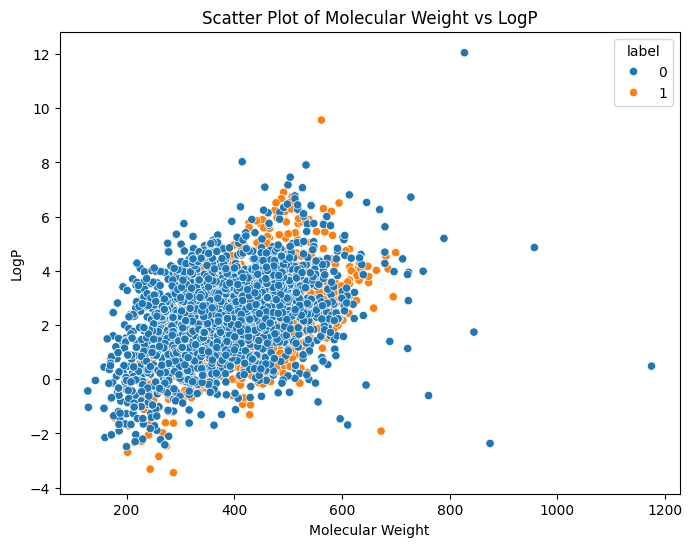

ValueError: Length of values (4918) does not match length of index (1586)

In [135]:
# prompt:  Further analysis, such as:
# # - Correlation analysis between properties and activity (label)
# # - Distribution analysis of different properties for active and inactive compounds
# # - Identifying compounds with specific property ranges
# # - Visualizing the properties in scatter plots or histograms
# # - Clustering compounds based on their properties
# # - Feature selection for building a predictive model

import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Function to calculate molecular properties (if not already defined)
def calculate_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        molecular_weight = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        num_h_donors = Lipinski.NumHDonors(mol)
        num_h_acceptors = Lipinski.NumHAcceptors(mol)
        tpsa = Descriptors.TPSA(mol)
        num_rotatable_bonds = Lipinski.NumRotatableBonds(mol)
        num_rings = Lipinski.RingCount(mol)
        num_atoms = mol.GetNumAtoms()  # Add calculation for NumAtoms
        return molecular_weight, logp, num_h_donors, num_h_acceptors, tpsa, num_rotatable_bonds, num_rings, num_atoms
    else:
        return None, None, None, None, None, None, None, None  # Return None for all properties if mol is None


# Apply the function to the 'Smiles' column for combined2 DataFrame and reset index
properties_df = combined2['Smiles'].apply(calculate_properties).apply(pd.Series)
properties_df = properties_df.reset_index(drop=True) # Reset index to avoid duplicates

# Assign calculated properties to combined2 using the reset index

# Apply the function to the 'Smiles' column for combined2 DataFrame
combined[['Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds', 'NumRings', 'NumAtoms']] = combined['Smiles'].apply(calculate_properties).apply(pd.Series)

# Correlation analysis between properties and activity (label)
correlation_matrix = combined[['Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds', 'NumRings', 'NumAtoms', 'label']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Properties and Activity')
plt.show()

# Distribution analysis of different properties for active and inactive compounds
plt.figure(figsize=(12, 6))
sns.histplot(data=combined, x='Molecular Weight', hue='label', kde=True)  # Use combined2 here
plt.title('Distribution of Molecular Weight for Active and Inactive Compounds')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=combined, x='LogP', hue='label', kde=True)  # Use combined2 here
plt.title('Distribution of LogP for Active and Inactive Compounds')
plt.show()

# Identifying compounds with specific property ranges
# For example, find compounds with LogP between 2 and 5
specific_compounds = combined[(combined['LogP'] >= 2) & (combined['LogP'] <= 5)]  # Use combined2 here
print(specific_compounds)

# Visualizing the properties in scatter plots or histograms
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined, x='Molecular Weight', y='LogP', hue='label')  # Use combined2 here
plt.title('Scatter Plot of Molecular Weight vs LogP')
plt.show()

# Clustering compounds based on their properties
# You can use KMeans clustering or hierarchical clustering
from sklearn.cluster import KMeans
X = combined[['Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds', 'NumRings', 'NumAtoms']]  # Use combined2 here
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
combined2['cluster'] = kmeans.labels_  # Assign clusters to combined2
print(combined2.groupby('cluster')['label'].mean()) # Check if clusters are related to activity

# Feature selection for building a predictive model
from sklearn.feature_selection import SelectKBest, f_classif
X = combined[['Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds', 'NumRings', 'NumAtoms']]  # Use combined2 here
y = combined['label']  # Use combined2 here
selector = SelectKBest(f_classif, k=5) # Select top 5 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(selected_features)

Sglt2

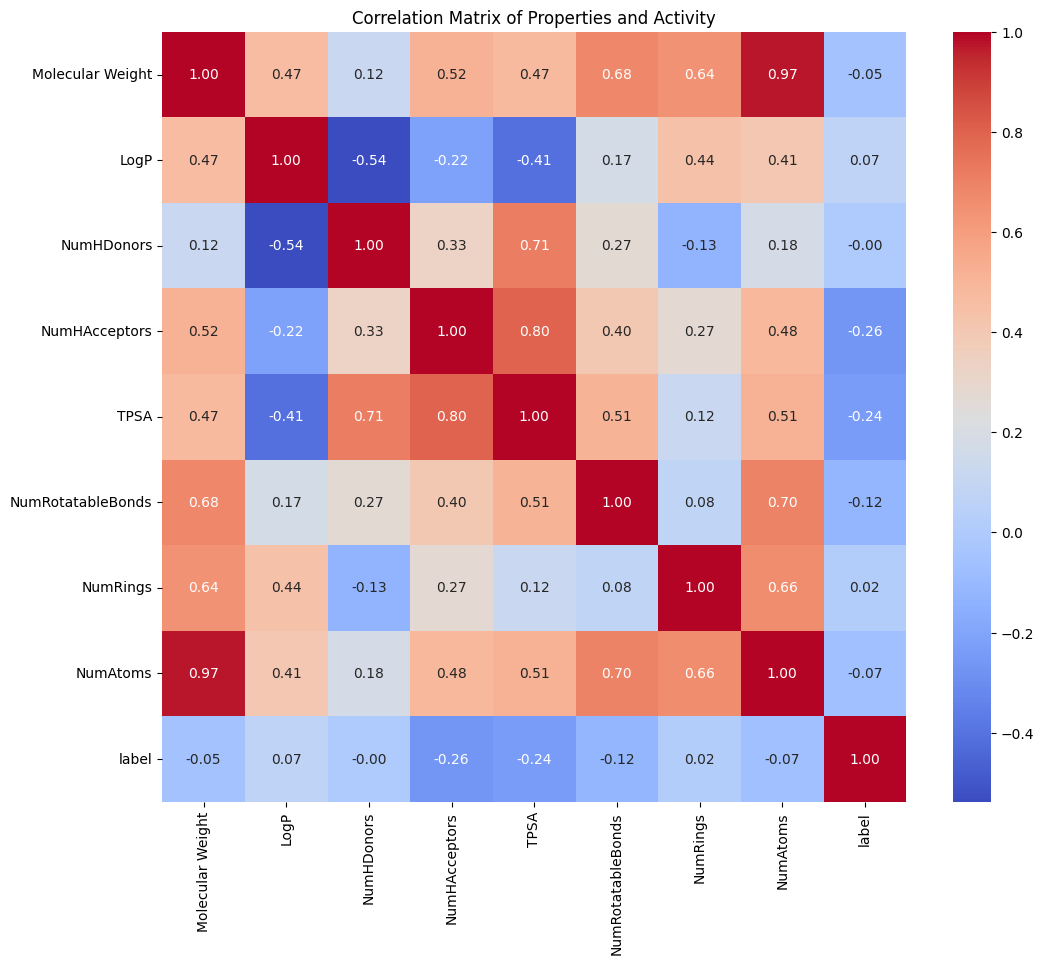

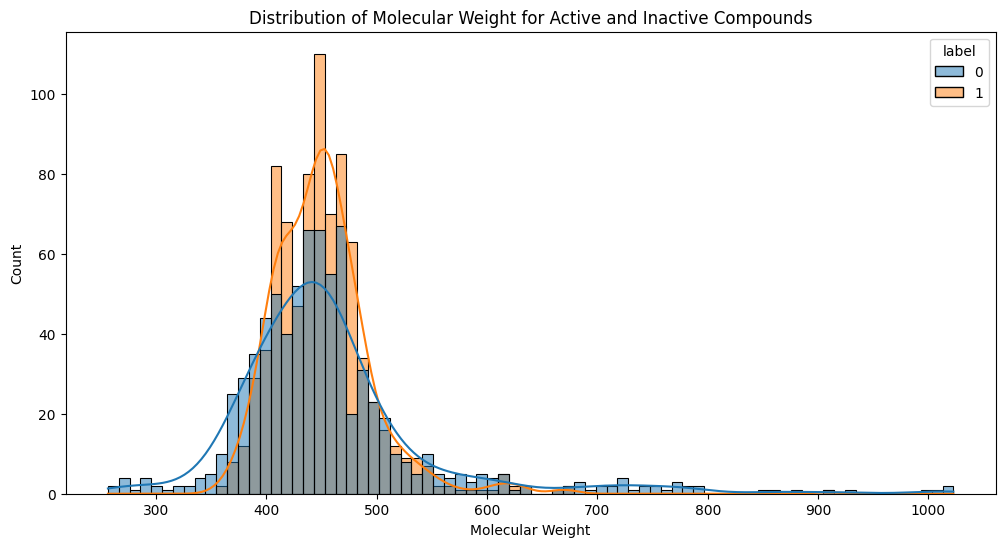

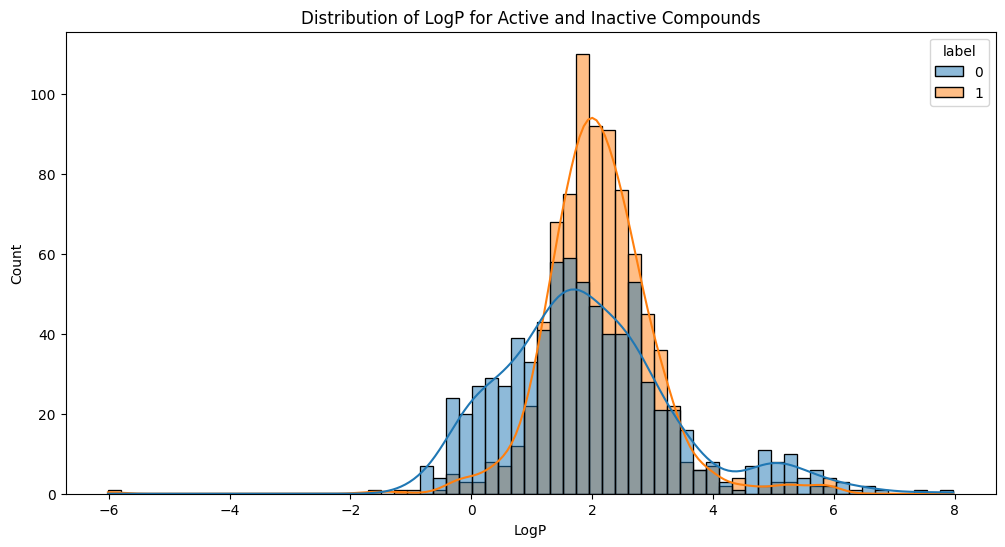

     Molecule ChEMBL ID                                             Smiles  \
0         CHEMBL3109014  OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...   
8         CHEMBL1085769  CCCCCCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[...   
17        CHEMBL1642516  O[C@@H]1[C@@H](O)[C@H](c2ccc(Cl)c(Cc3ncc(-c4cc...   
18        CHEMBL1642520  CSC[C@H]1O[C@@H](c2ccc(Cl)c(Cc3ncc(-c4ccco4)s3...   
26        CHEMBL2048488  CCc1ccc(Cc2cc([C@@H]3C[C@H](CO)[C@@H](O)[C@H](...   
...                 ...                                                ...   
1883        CHEMBL45068                  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O   
1907       CHEMBL569434  CCOc1ccc(Cc2cc([C@@H]3OC(OC)[C@@H](O)[C@H](O)[...   
1940      CHEMBL2028665  CCOC(=O)OC[C@H]1O[C@@H](Oc2nn(C(C)C)c(C)c2Cc2c...   
1947       CHEMBL540945  C/C=C1/CN2[C@@H]3C[C@@]45c6cc(OC)ccc6N(C)[C@]4...   
1995       CHEMBL334384               O=C(/C=C/c1ccc(F)cc1)c1c(O)cc(O)cc1O   

     Standard Type  Standard Value Standard Relation Standard U

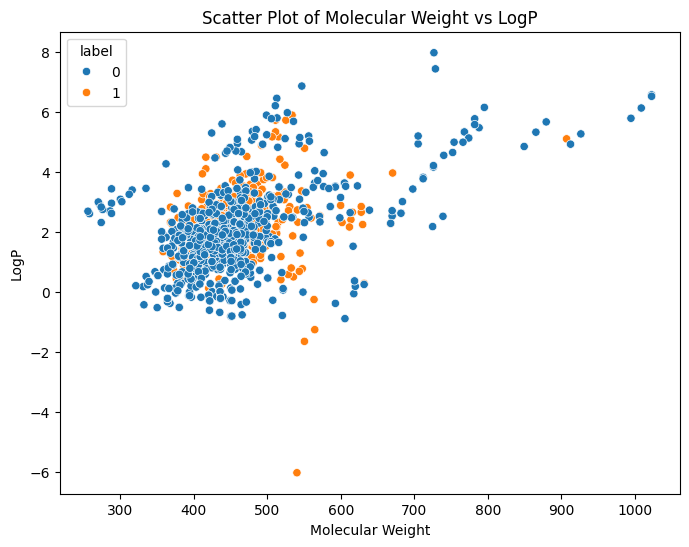

cluster
0    0.499276
1    0.212121
2    0.559710
Name: label, dtype: float64
Index(['LogP', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds', 'NumAtoms'], dtype='object')


In [130]:
# prompt:  Further analysis, such as:
# # - Correlation analysis between properties and activity (label)
# # - Distribution analysis of different properties for active and inactive compounds
# # - Identifying compounds with specific property ranges
# # - Visualizing the properties in scatter plots or histograms
# # - Clustering compounds based on their properties
# # - Feature selection for building a predictive model

import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Function to calculate molecular properties (if not already defined)
def calculate_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        molecular_weight = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        num_h_donors = Lipinski.NumHDonors(mol)
        num_h_acceptors = Lipinski.NumHAcceptors(mol)
        tpsa = Descriptors.TPSA(mol)
        num_rotatable_bonds = Lipinski.NumRotatableBonds(mol)
        num_rings = Lipinski.RingCount(mol)
        num_atoms = mol.GetNumAtoms()  # Add calculation for NumAtoms
        return molecular_weight, logp, num_h_donors, num_h_acceptors, tpsa, num_rotatable_bonds, num_rings, num_atoms
    else:
        return None, None, None, None, None, None, None, None  # Return None for all properties if mol is None


# Apply the function to the 'Smiles' column for combined2 DataFrame
combined2[['Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds', 'NumRings', 'NumAtoms']] = combined2['Smiles'].apply(calculate_properties).apply(pd.Series)

# Correlation analysis between properties and activity (label)
correlation_matrix = combined2[['Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds', 'NumRings', 'NumAtoms', 'label']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Properties and Activity')
plt.show()

# Distribution analysis of different properties for active and inactive compounds
plt.figure(figsize=(12, 6))
sns.histplot(data=combined2, x='Molecular Weight', hue='label', kde=True)  # Use combined2 here
plt.title('Distribution of Molecular Weight for Active and Inactive Compounds')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=combined2, x='LogP', hue='label', kde=True)  # Use combined2 here
plt.title('Distribution of LogP for Active and Inactive Compounds')
plt.show()

# Identifying compounds with specific property ranges
# For example, find compounds with LogP between 2 and 5
specific_compounds = combined2[(combined2['LogP'] >= 2) & (combined2['LogP'] <= 5)]  # Use combined2 here
print(specific_compounds)

# Visualizing the properties in scatter plots or histograms
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined2, x='Molecular Weight', y='LogP', hue='label')  # Use combined2 here
plt.title('Scatter Plot of Molecular Weight vs LogP')
plt.show()

# Clustering compounds based on their properties
# You can use KMeans clustering or hierarchical clustering
from sklearn.cluster import KMeans
X = combined2[['Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds', 'NumRings', 'NumAtoms']]  # Use combined2 here
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
combined2['cluster'] = kmeans.labels_  # Assign clusters to combined2
print(combined2.groupby('cluster')['label'].mean()) # Check if clusters are related to activity

# Feature selection for building a predictive model
from sklearn.feature_selection import SelectKBest, f_classif
X = combined2[['Molecular Weight', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds', 'NumRings', 'NumAtoms']]  # Use combined2 here
y = combined2['label']  # Use combined2 here
selector = SelectKBest(f_classif, k=5) # Select top 5 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(selected_features)

In [136]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize # Import the required module

def standardize_smiles(smiles):
  """Standardizes a SMILES string using RDKit."""
  mol = Chem.MolFromSmiles(smiles)
  if mol is not None:
    # Remove stereochemistry
    Chem.rdmolops.RemoveStereochemistry(mol)
    # Neutralize the molecule
    mol = rdMolStandardize.ChargeParent(mol) # Use the correct function to neutralize charges
    # Convert to canonical SMILES
    return Chem.MolToSmiles(mol, isomericSmiles=False)
  else:
    return None

# Apply the function to the 'Smiles' column
combined['Standardized_Smiles'] = combined['Smiles'].apply(standardize_smiles)

print(combined[['Smiles', 'Standardized_Smiles']].head())

Streaming output truncated to the last 5000 lines.
[08:19:55] Running LargestFragmentChooser
[08:19:55] Fragment: NC1Cc2c(ccc3ccc(=O)oc23)OC1c1cc(F)c(F)cc1F
[08:19:55] New largest fragment: NC1Cc2c(ccc3ccc(=O)oc23)OC1c1cc(F)c(F)cc1F (37)
[08:19:55] Running Uncharger
[08:19:55] Initializing MetalDisconnector
[08:19:55] Running MetalDisconnector
[08:19:55] Initializing Normalizer
[08:19:55] Running Normalizer
[08:19:55] Initializing MetalDisconnector
[08:19:55] Running MetalDisconnector
[08:19:55] Initializing Normalizer
[08:19:55] Running Normalizer
[08:19:55] Running LargestFragmentChooser
[08:19:55] Fragment: CC#CCn1c(N2CCCC(N)C2)nc2c1c(=O)n(CCCN1CCC(C(=O)OCC)CC1)c(=O)n2C
[08:19:55] New largest fragment: CC#CCn1c(N2CCCC(N)C2)nc2c1c(=O)n(CCCN1CCC(C(=O)OCC)CC1)c(=O)n2C (76)
[08:19:55] Running Uncharger
[08:19:55] Initializing MetalDisconnector
[08:19:55] Running MetalDisconnector
[08:19:55] Initializing Normalizer
[08:19:55] Running Normalizer
[08:19:55] Initializing MetalDisconnector
[

                                               Smiles  \
2   N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3       COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4           CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
17             N#C[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccccc1   
18  N[C@H]1C[C@@H](N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)...   

                                  Standardized_Smiles  
2            N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2  
3                COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC  
4               CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F  
17                       N#CC1CCCN1C(=O)C(N)Cc1ccccc1  
18  NC1CC(N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)C1c1cc(F)...  


[08:19:58] Initializing Normalizer
[08:19:58] Running Normalizer
[08:19:58] Initializing MetalDisconnector
[08:19:58] Running MetalDisconnector
[08:19:58] Initializing Normalizer
[08:19:58] Running Normalizer
[08:19:58] Running LargestFragmentChooser
[08:19:58] Fragment: CC(C)c1cccc(C(C)C)c1N1C(=O)c2ccc(O)cc2C1=O
[08:19:58] New largest fragment: CC(C)c1cccc(C(C)C)c1N1C(=O)c2ccc(O)cc2C1=O (45)
[08:19:58] Running Uncharger
[08:19:58] Initializing MetalDisconnector
[08:19:58] Running MetalDisconnector
[08:19:58] Initializing Normalizer
[08:19:58] Running Normalizer
[08:19:58] Initializing MetalDisconnector
[08:19:58] Running MetalDisconnector
[08:19:58] Initializing Normalizer
[08:19:58] Running Normalizer
[08:19:58] Running LargestFragmentChooser
[08:19:58] Fragment: NC(Cc1c[nH]cn1)C(=O)N1CCCC1
[08:19:58] New largest fragment: NC(Cc1c[nH]cn1)C(=O)N1CCCC1 (31)
[08:19:58] Running Uncharger
[08:19:58] Initializing MetalDisconnector
[08:19:58] Running MetalDisconnector
[08:19:58] Initializin

In [137]:
combined


Molecule ChEMBL ID                                             Smiles  \
2          CHEMBL511785  N#C[C@@H]1C[C@H](F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2   
3          CHEMBL472101      COc1ccc(CCNCC(=O)N2C[C@@H](F)C[C@H]2C#N)cc1OC   
4          CHEMBL427257          CC1C(=O)NCCCN1C(=O)C[C@H](N)Cc1cc(F)ccc1F   
17         CHEMBL201268             N#C[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccccc1   
18        CHEMBL3697947  N[C@H]1C[C@@H](N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)...   
...                 ...                                                ...   
7271       CHEMBL288114                            O=C(O)c1cc(O)c(O)c(O)c1   
7272       CHEMBL257839  OC[C@H]1O[C@@H](Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc...   
7273           CHEMBL44               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12   
7274       CHEMBL275638                        O=c1cc(-c2ccccc2)oc2ccccc12   
7275          CHEMBL151            O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12   

     Standard Type  Standard Value Standard Relation Standard Units  label  \
2             IC50             4.1               '='             nM      1   
3             IC50            27.0               '='             nM      1   
4             IC50            11.5               '='             nM      1   
17            IC50            27.0               '='             nM      1   
18            IC50             2.9               '='             nM      1   
...            ...             ...               ...            ...    ...   
7271          IC50          4650.0               '='             nM      0   
7272          IC50           420.0               '='             nM      0   
7273          IC50           480.0               '='             nM      0   
7274          IC50           170.0               '='             nM      0   
7275          IC50           120.0               '='             nM      0   

           MW     LogP  HBD  ...  nCIC  RBN nBnz  Molecular Weight  \
2     305.397  2.00738  1.0  ...     5    3    0           305.397   
3     335.379  1.29848  1.0  ...     2    7    1           335.379   
4     325.359  0.96170  2.0  ...     2    4    1           325.359   
17    243.310  1.07098  1.0  ...     2    3    1           243.310   
18    399.449  2.06970  3.0  ...     5    4    3           399.449   
...       ...      ...  ...  ...   ...  ...  ...               ...   
7271  170.120  0.50160  4.0  ...     1    1    1           170.120   
7272  449.388  0.38200  8.0  ...     4    4    3           449.388   
7273  270.240  2.57680  3.0  ...     3    1    3           270.240   
7274  222.243  3.46000  0.0  ...     3    1    3           222.243   
7275  286.239  2.28240  4.0  ...     3    1    3           286.239   

      NumHDonors  NumHAcceptors  NumRotatableBonds  NumRings  NumAtoms  \
2            1.0            3.0                3.0       5.0      22.0   
3            1.0            5.0                7.0       2.0      24.0   
4            2.0            3.0                4.0       2.0      23.0   
17           1.0            3.0                3.0       2.0      18.0   
18           3.0            5.0                4.0       5.0      29.0   
...          ...            ...                ...       ...       ...   
7271         4.0            4.0                1.0       1.0      12.0   
7272         8.0           10.0                4.0       4.0      32.0   
7273         3.0            5.0                1.0       3.0      20.0   
7274         0.0            2.0                1.0       3.0      17.0   
7275         4.0            6.0                1.0       3.0      21.0   

                                    Standardized_Smiles  
2              N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2  
3                  COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC  
4                 CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F  
17                         N#CC1CCCN1C(=O)C(N)Cc1ccccc1  
18    NC1CC(N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)C1c1cc(F)...  
...                                                 .

Sglt2

In [138]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize # Import the required module

def standardize_smiles(smiles):
  """Standardizes a SMILES string using RDKit."""
  mol = Chem.MolFromSmiles(smiles)
  if mol is not None:
    # Remove stereochemistry
    Chem.rdmolops.RemoveStereochemistry(mol)
    # Neutralize the molecule
    mol = rdMolStandardize.ChargeParent(mol) # Use the correct function to neutralize charges
    # Convert to canonical SMILES
    return Chem.MolToSmiles(mol, isomericSmiles=False)
  else:
    return None

# Apply the function to the 'Smiles' column and assign the result to combined2
combined2['Standardized_Smiles'] = combined2['Smiles'].apply(standardize_smiles)

print(combined2[['Smiles', 'Standardized_Smiles']].head()) # Print the combined2 DataFrame

Streaming output truncated to the last 5000 lines.
[08:22:24] Running Normalizer
[08:22:24] Running LargestFragmentChooser
[08:22:24] Fragment: COCCOc1ccc(Cc2cc(C3OC(OC)C(O)C(O)C3O)ccc2Cl)cc1
[08:22:24] New largest fragment: COCCOc1ccc(Cc2cc(C3OC(OC)C(O)C(O)C3O)ccc2Cl)cc1 (57)
[08:22:24] Running Uncharger
[08:22:24] Initializing MetalDisconnector
[08:22:24] Running MetalDisconnector
[08:22:24] Initializing Normalizer
[08:22:24] Running Normalizer
[08:22:24] Initializing MetalDisconnector
[08:22:24] Running MetalDisconnector
[08:22:24] Initializing Normalizer
[08:22:24] Running Normalizer
[08:22:24] Running LargestFragmentChooser
[08:22:24] Fragment: COC1OC(c2ccc(Cl)c(Cc3ccc(OCCO)cc3)c2)C(O)C(O)C1O
[08:22:24] New largest fragment: COC1OC(c2ccc(Cl)c(Cc3ccc(OCCO)cc3)c2)C(O)C(O)C1O (54)
[08:22:24] Running Uncharger
[08:22:24] Initializing MetalDisconnector
[08:22:24] Running MetalDisconnector
[08:22:24] Initializing Normalizer
[08:22:24] Running Normalizer
[08:22:24] Initializing MetalDisc

                                               Smiles  \
0   OC[C@H]1O[C@@H](n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc...   
8   CCCCCCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[...   
13  CCOc1ccc(Cc2cc([C@]34OC[C@](COC(C)=O)(O3)[C@@H...   
14  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H]...   
17  O[C@@H]1[C@@H](O)[C@H](c2ccc(Cl)c(Cc3ncc(-c4cc...   

                                  Standardized_Smiles  
0   OCC1OC(n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc32)C(O)C(...  
8   CCCCCCOc1ccc(Cc2cc(C3OC(CO)C(O)C(O)C3O)ccc2Cl)nn1  
13  CCOc1ccc(Cc2cc(C34OCC(COC(C)=O)(O3)C(O)C(O)C4O...  
14  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1OC1OC(CO)C(O)C...  
17  OC1C(c2ccc(Cl)c(Cc3ncc(-c4ccco4)s3)c2)OC(C(F)F...  


[08:22:29] Running MetalDisconnector
[08:22:29] Initializing Normalizer
[08:22:29] Running Normalizer
[08:22:29] Initializing MetalDisconnector
[08:22:29] Running MetalDisconnector
[08:22:29] Initializing Normalizer
[08:22:29] Running Normalizer
[08:22:29] Running LargestFragmentChooser
[08:22:29] Fragment: Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(OC2OC(CO)C(O)C(O)C2O)c1
[08:22:29] New largest fragment: Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(OC2OC(CO)C(O)C(O)C2O)c1 (59)
[08:22:29] Running Uncharger
[08:22:29] Initializing MetalDisconnector
[08:22:29] Running MetalDisconnector
[08:22:29] Initializing Normalizer
[08:22:29] Running Normalizer
[08:22:29] Initializing MetalDisconnector
[08:22:29] Running MetalDisconnector
[08:22:29] Initializing Normalizer
[08:22:29] Running Normalizer
[08:22:29] Running LargestFragmentChooser
[08:22:29] Fragment: CCOc1ccc(Cc2cc(C3OC(CO)C(O)C(O)C3O)ccc2Cl)cc1
[08:22:29] New largest fragment: CCOc1ccc(Cc2cc(C3OC(CO)C(O)C(O)C3O)ccc2Cl)cc1 (53)
[08:22:29] Running Uncharger


In [139]:
combined.to_csv('Dppiv_standardized.csv', index=False)

In [140]:
combined2.to_csv('Sglt2_standardized.csv', index=False)

In [142]:
# prompt: create a new data  from aromatase_standardized.csv, select : Filter
# Molecule ChEMBL ID, Standarized_Smiles, label

import pandas as pd
new_df = pd.read_csv('Dppiv_standardized.csv', usecols=['Molecule ChEMBL ID', 'Standardized_Smiles', 'label'])
print(new_df.head())


  Molecule ChEMBL ID  label                                Standardized_Smiles
0       CHEMBL511785      1           N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2
1       CHEMBL472101      1               COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC
2       CHEMBL427257      1              CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F
3       CHEMBL201268      1                       N#CC1CCCN1C(=O)C(N)Cc1ccccc1
4      CHEMBL3697947      1  NC1CC(N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)C1c1cc(F)...


In [143]:
df3 = new_df
df3


Molecule ChEMBL ID  label  \
0          CHEMBL511785      1   
1          CHEMBL472101      1   
2          CHEMBL427257      1   
3          CHEMBL201268      1   
4         CHEMBL3697947      1   
...                 ...    ...   
4913       CHEMBL288114      0   
4914       CHEMBL257839      0   
4915           CHEMBL44      0   
4916       CHEMBL275638      0   
4917          CHEMBL151      0   

                                    Standardized_Smiles  
0              N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2  
1                  COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC  
2                 CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F  
3                          N#CC1CCCN1C(=O)C(N)Cc1ccccc1  
4     NC1CC(N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)C1c1cc(F)...  
...                                                 ...  
4913                            O=C(O)c1cc(O)c(O)c(O)c1  
4914  OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)c(O)c2...  
4915               O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12  
4916                        O=c1cc(-c2ccccc2)oc2ccccc12  
4917            O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12  

[4918 rows x 3 columns]

In [145]:
import pandas as pd
new_df_2 = pd.read_csv('Sglt2_standardized.csv', usecols=['Molecule ChEMBL ID', 'Standardized_Smiles', 'label'])
print(new_df.head())
df4=new_df_2
df4


  Molecule ChEMBL ID  label                                Standardized_Smiles
0       CHEMBL511785      1           N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2
1       CHEMBL472101      1               COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC
2       CHEMBL427257      1              CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F
3       CHEMBL201268      1                       N#CC1CCCN1C(=O)C(N)Cc1ccccc1
4      CHEMBL3697947      1  NC1CC(N2Cc3cn[nH]c3C2)CN(Cc2cn[nH]c2)C1c1cc(F)...


Molecule ChEMBL ID  label  \
0         CHEMBL3109014      1   
1         CHEMBL1085769      1   
2         CHEMBL3639552      1   
3          CHEMBL245067      1   
4         CHEMBL1642516      1   
...                 ...    ...   
1581      CHEMBL3960449      0   
1582      CHEMBL3923809      0   
1583       CHEMBL334384      0   
1584       CHEMBL245067      0   
1585       CHEMBL245067      0   

                                    Standardized_Smiles  
0     OCC1OC(n2cc(Cc3ccc(C4CCC4)cc3)c3ccccc32)C(O)C(...  
1     CCCCCCOc1ccc(Cc2cc(C3OC(CO)C(O)C(O)C3O)ccc2Cl)nn1  
2     CCOc1ccc(Cc2cc(C34OCC(COC(C)=O)(O3)C(O)C(O)C4O...  
3     O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1OC1OC(CO)C(O)C...  
4     OC1C(c2ccc(Cl)c(Cc3ncc(-c4ccco4)s3)c2)OC(C(F)F...  
...                                                 ...  
1581  Cc1[nH]nc(OC2OC(CO)C(O)C(O)C2O)c1Cc1ccc(OC(C)C...  
1582    CCOc1ccc(Cc2c(OC3OC(CO)C(O)C(O)C3O)n[nH]c2C)cc1  
1583                 O=C(C=Cc1ccc(F)cc1)c1c(O)cc(O)cc1O  
1584  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1OC1OC(CO)C(O)C...  
1585  O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1OC1OC(CO)C(O)C...  

[1586 rows x 3 columns]

In [ ]:
! pip install padelpy

In [ ]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2025-02-07 18:27:21--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2025-02-07 18:27:21--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip.1’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2025-02-07 18:27:21 (67.5 MB/s) - ‘fingerprints_xml.zip.1’ saved [10871/10871]

Archive:  fingerprint

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
!pip install xgboost


In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
df3 = new_df
df3

Molecule ChEMBL ID  label  \
0           CHEMBL25437      1   
1          CHEMBL511785      1   
2          CHEMBL472101      1   
3          CHEMBL427257      1   
4          CHEMBL189881      1   
...                 ...    ...   
4203      CHEMBL4246951      0   
4204      CHEMBL3233842      0   
4205        CHEMBL67279      0   
4206       CHEMBL592005      0   
4207       CHEMBL288114      0   

                                   Standardized_Smiles  
0     NC(C(=O)N1CCCC1)C1CCC(NS(=O)(=O)c2ccc(F)cc2F)CC1  
1             N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2  
2                 COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC  
3                CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F  
4        CC(c1ccc(-c2ccc(F)cc2)cc1)C(N)C(=O)N1CCC(F)C1  
...                                                ...  
4203                 Brc1nc2n(n1)CC(c1cc3ccccc3o1)=NN2  
4204        N#CC1CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2ccccc12  
4205                        CC(C)C(N)C(=O)N1CCCC1B(O)O  
4206        COc1cc(-c2[o+]c3cc(O)cc(O)c3cc2O)cc(OC)c1O  
4207                           O=C(O)c1cc(O)c(O)c(O)c1  

[4208 rows x 3 columns]

In [ ]:

import pandas as pd
new_df = pd.read_csv('Dppiv_standardized.csv', usecols=['Molecule ChEMBL ID', 'Standardized_Smiles', 'label'])
print(new_df.head())


df5_Dppiv = pd.concat( [df3['Standardized_Smiles'],df3['Molecule ChEMBL ID']], axis=1 )
df5_Dppiv.to_csv('molecule.smi', sep='\t', index=False, header=False)
df5_Dppiv

  Molecule ChEMBL ID  label                               Standardized_Smiles
0        CHEMBL25437      1  NC(C(=O)N1CCCC1)C1CCC(NS(=O)(=O)c2ccc(F)cc2F)CC1
1       CHEMBL511785      1          N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2
2       CHEMBL472101      1              COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC
3       CHEMBL427257      1             CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F
4       CHEMBL189881      1     CC(c1ccc(-c2ccc(F)cc2)cc1)C(N)C(=O)N1CCC(F)C1


Standardized_Smiles Molecule ChEMBL ID
0     NC(C(=O)N1CCCC1)C1CCC(NS(=O)(=O)c2ccc(F)cc2F)CC1        CHEMBL25437
1             N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2       CHEMBL511785
2                 COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC       CHEMBL472101
3                CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F       CHEMBL427257
4        CC(c1ccc(-c2ccc(F)cc2)cc1)C(N)C(=O)N1CCC(F)C1       CHEMBL189881
...                                                ...                ...
4203                 Brc1nc2n(n1)CC(c1cc3ccccc3o1)=NN2      CHEMBL4246951
4204        N#CC1CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2ccccc12      CHEMBL3233842
4205                        CC(C)C(N)C(=O)N1CCCC1B(O)O        CHEMBL67279
4206        COc1cc(-c2[o+]c3cc(O)cc(O)c3cc2O)cc(OC)c1O       CHEMBL592005
4207                           O=C(O)c1cc(O)c(O)c(O)c1       CHEMBL288114

[4208 rows x 2 columns]

In [ ]:
!pip install padelpy
from padelpy import padeldescriptor # Import the padeldescriptor function from the padelpy module

import pandas as pd
fingerprint_list = ['AtomPairs2D', 'EState', 'CDKextended', 'CDK', 'CDKgraphonly',
                    'KlekotaRothCount', 'KlekotaRoth', 'MACCS', 'PubChem',
                    'SubstructureCount', 'Substructure']

for fingerprint in fingerprint_list:
  fingerprint_output_file = ''.join([fingerprint,'.csv'])
  fingerprint_descriptortypes = fp[fingerprint]

  padeldescriptor(mol_dir='molecule.smi', # Call padeldescriptor function
                  d_file=fingerprint_output_file,
                  descriptortypes=fingerprint_descriptortypes,
                  detectaromaticity=True,
                  standardizenitro=True,
                  standardizetautomers=True,
                  threads=2,
                  removesalt=True,
                  log=True,
                  fingerprints=True)

  descriptors = pd.read_csv(fingerprint_output_file)
  # You can now process or store the descriptors dataframe as needed
  print(f"Descriptors for {fingerprint} calculated and saved to {fingerprint_output_file}")
  # Example: store the dataframe in a dictionary or list
  #your_dataframe_dict[fingerprint] = descriptors

Descriptors for AtomPairs2D calculated and saved to AtomPairs2D.csv
Descriptors for EState calculated and saved to EState.csv
Descriptors for CDKextended calculated and saved to CDKextended.csv
Descriptors for CDK calculated and saved to CDK.csv
Descriptors for CDKgraphonly calculated and saved to CDKgraphonly.csv


In [ ]:
# prompt: from all the calculated AtomPairs2D',
# #  'EState',
# #  'CDKextended',
# #  'CDK',
# #  'CDKgraphonly',
# #  'KlekotaRothCount',
# #  'KlekotaRoth',
# #  'MACCS',
# #  'PubChem',
# #  'SubstructureCount',
# #  'Substructure descriptors add in each new colunm label from df4 and store as dataframe

import pandas as pd
fingerprint_list = ['AtomPairs2D', 'EState', 'CDKextended', 'CDK', 'CDKgraphonly',
                    'KlekotaRothCount', 'KlekotaRoth', 'MACCS', 'PubChem',
                    'SubstructureCount', 'Substructure']

# Create a dictionary to store DataFrames
descriptors_dfs = {}

# Loop through the list of fingerprints
for fingerprint in fingerprint_list:
  fingerprint_output_file = ''.join([fingerprint,'.csv'])  # Construct the file name

  try:
    descriptors_df = pd.read_csv(fingerprint_output_file)
    descriptors_df = pd.concat([descriptors_df, df3['label']], axis=1)  # Add the 'label' column from df4
    descriptors_dfs[fingerprint] = descriptors_df  # Store the DataFrame in the dictionary
  except FileNotFoundError:
    print(f"File not found for {fingerprint}: {fingerprint_output_file}")

# prompt: for each developed dataframe name them descriptor_fringerprint

# Create a dictionary to store DataFrames with descriptive names
descriptors_dfs_renamed = {}

# Loop through the list of fingerprints and rename DataFrames
for fingerprint, df in descriptors_dfs.items():
  if 'Name' in df.columns:
    df = df.drop('Name', axis=1)
  descriptors_dfs_renamed[f'descriptors_{fingerprint}'] = df

# Now you have a dictionary 'descriptors_dfs_renamed' where the keys are like 'descriptors_MACCS',
# 'descriptors_AtomPairs2D', etc., and the values are the corresponding DataFrames.

# You can access the DataFrames using these keys:
# Example:
# descriptors_MACCS_df = descriptors_dfs_renamed['descriptors_MACCS']

# Now you have a dictionary 'descriptors_dfs' where the keys are the fingerprint names
# and the values are the corresponding DataFrames with 'label' added.
# prompt: print them

# prompt: in all the developed Dataframe, remove the colunm:"Name" and print them

for fingerprint, df in descriptors_dfs.items():
  if 'Name' in df.columns:
    df = df.drop('Name', axis=1)
    print(f"\n--- {fingerprint} Fingerprint DataFrame (Name column removed) ---")
    print(df.head())
  else:
    print(f"\n--- {fingerprint} Fingerprint DataFrame (Name column not found) ---")
    print(df.head())



In [ ]:
# prompt: from all the calculated AtomPairs2D',
# #  'EState',
# #  'CDKextended',
# #  'CDK',
# #  'CDKgraphonly',
# #  'KlekotaRothCount',
# #  'KlekotaRoth',
# #  'MACCS',
# #  'PubChem',
# #  'SubstructureCount',
# #  'Substructure descriptors add in each new colunm label from df4 and store as dataframe

import pandas as pd
fingerprint_list = ['AtomPairs2D', 'EState', 'CDKextended', 'CDK', 'CDKgraphonly',
                    'KlekotaRothCount', 'KlekotaRoth', 'MACCS', 'PubChem',
                    'SubstructureCount', 'Substructure']

# Create a dictionary to store DataFrames
descriptors_dfs = {}

# Loop through the list of fingerprints
for fingerprint in fingerprint_list:
  fingerprint_output_file = ''.join([fingerprint,'.csv'])  # Construct the file name

  try:
    descriptors_df = pd.read_csv(fingerprint_output_file)
    descriptors_df = pd.concat([descriptors_df, df3['label']], axis=1)  # Add the 'label' column from df4
    descriptors_dfs[fingerprint] = descriptors_df  # Store the DataFrame in the dictionary
  except FileNotFoundError:
    print(f"File not found for {fingerprint}: {fingerprint_output_file}")

# prompt: for each developed dataframe name them descriptor_fringerprint

# Create a dictionary to store DataFrames with descriptive names
descriptors_dfs_renamed = {}

# Loop through the list of fingerprints and rename DataFrames
for fingerprint, df in descriptors_dfs.items():
  if 'Name' in df.columns:
    df = df.drop('Name', axis=1)
  descriptors_dfs_renamed[f'descriptors_{fingerprint}'] = df

# Now you have a dictionary 'descriptors_dfs_renamed' where the keys are like 'descriptors_MACCS',
# 'descriptors_AtomPairs2D', etc., and the values are the corresponding DataFrames.

# You can access the DataFrames using these keys:
# Example:
# descriptors_MACCS_df = descriptors_dfs_renamed['descriptors_MACCS']

# Now you have a dictionary 'descriptors_dfs' where the keys are the fingerprint names
# and the values are the corresponding DataFrames with 'label' added.
# prompt: print them

# prompt: in all the developed Dataframe, remove the colunm:"Name" and print them

for fingerprint, df in descriptors_dfs.items():
  if 'Name' in df.columns:
    df = df.drop('Name', axis=1)
    print(f"\n--- {fingerprint} Fingerprint DataFrame (Name column removed) ---")
    print(df.head())
  else:
    print(f"\n--- {fingerprint} Fingerprint DataFrame (Name column not found) ---")
    print(df.head())


--- AtomPairs2D Fingerprint DataFrame (Name column removed) ---
   AD2D1  AD2D2  AD2D3  AD2D4  AD2D5  AD2D6  AD2D7  AD2D8  AD2D9  AD2D10  ...  \
0      1      1      1      0      0      0      0      0      0       0  ...   
1      1      0      1      0      0      0      0      0      0       0  ...   
2      1      0      1      0      0      0      0      0      0       0  ...   
3      1      0      1      0      0      0      0      0      0       0  ...   
4      1      1      1      0      0      0      0      0      0       0  ...   

   AD2D772  AD2D773  AD2D774  AD2D775  AD2D776  AD2D777  AD2D778  AD2D779  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        

Randomforest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    Rf = RandomForestClassifier(max_depth = None, min_samples_split= 2, n_estimators = 100, random_state=42)
    classifiers[descriptor_name] = Rf

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    Rf = classifiers[name]
    Rf.fit(X_train, y_train)
    y_train_pred = Rf.predict(X_train)
    y_test_pred = Rf.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'Rf_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_Rf = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_Rf.fit(X_train, y_train)
y_train_pred_stack = stack_Rf.predict(X_train)
y_test_pred_stack = stack_Rf.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_Rf_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)


Adaboost

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    Ada = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 200, random_state=42)
    classifiers[descriptor_name] = Ada

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    Ada = classifiers[name]
    Ada.fit(X_train, y_train)
    y_train_pred = Ada.predict(X_train)
    y_test_pred = Ada.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'Ada_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_Ada = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_Ada.fit(X_train, y_train)
y_train_pred_stack = stack_Ada.predict(X_train)
y_test_pred_stack = stack_Ada.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_Ada_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    GB = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 100, random_state=42)
    classifiers[descriptor_name] = GB

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    GB = classifiers[name]
    GB.fit(X_train, y_train)
    y_train_pred = GB.predict(X_train)
    y_test_pred = GB.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'GB_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_GB = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_GB.fit(X_train, y_train)
y_train_pred_stack = stack_GB.predict(X_train)
y_test_pred_stack = stack_GB.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_GB_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

Decision Tree

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    DT = DecisionTreeClassifier(max_depth = None, min_samples_split = 5, random_state=42)
    classifiers[descriptor_name] = DT

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    DT = classifiers[name]
    DT.fit(X_train, y_train)
    y_train_pred = DT.predict(X_train)
    y_test_pred = DT.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'DT_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_DT = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_DT.fit(X_train, y_train)
y_train_pred_stack = stack_DT.predict(X_train)
y_test_pred_stack = stack_DT.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_DT_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

SVM

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}
# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    SVM = SVC(C = 10, kernel = 'rbf', random_state=42, probability=True)
    classifiers[descriptor_name] = SVM

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    SVM = classifiers[name]
    SVM.fit(X_train, y_train)
    y_train_pred = SVM.predict(X_train)
    y_test_pred = SVM.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'SVM_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_SVM = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_SVM.fit(X_train, y_train)
y_train_pred_stack = stack_SVM.predict(X_train)
y_test_pred_stack = stack_SVM.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_SVM_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

KNN

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    KNN =  KNeighborsClassifier(n_neighbors =5)
    classifiers[descriptor_name] = KNN

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    KNN = classifiers[name]
    KNN.fit(X_train, y_train)
    y_train_pred = KNN.predict(X_train)
    y_test_pred = KNN.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'KNN_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_KNN = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_SVM.fit(X_train, y_train)
y_train_pred_stack = stack_KNN.predict(X_train)
y_test_pred_stack = stack_KNN.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_KNN_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

NotFittedError: This StackingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

MLP

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    MLP =  MLPClassifier(alpha = 0.0001, hidden_layer_sizes = (100,), random_state=42)
    classifiers[descriptor_name] = MLP

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    MLP = classifiers[name]
    MLP.fit(X_train, y_train)
    y_train_pred = MLP.predict(X_train)
    y_test_pred = MLP.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'MLP_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_MLP = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_MLP.fit(X_train, y_train)
y_train_pred_stack = stack_MLP.predict(X_train)
y_test_pred_stack = stack_MLP.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_MLP_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

Naive Bayes

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    NB = GaussianNB()
    classifiers[descriptor_name] = MLP

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    NB = classifiers[name]
    NB.fit(X_train, y_train)
    y_train_pred = NB.predict(X_train)
    y_test_pred = NB.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'NB_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_NB = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_NB.fit(X_train, y_train)
y_train_pred_stack = stack_NB.predict(X_train)
y_test_pred_stack = stack_NB.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_NB_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

Logistic Regression

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    LR = LogisticRegression(C = 1, penalty = 'l2', random_state=42, max_iter=1000)
    classifiers[descriptor_name] = LR

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    LR = classifiers[name]
    LR.fit(X_train, y_train)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'LR_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_LR = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_LR.fit(X_train, y_train)
y_train_pred_stack = stack_LR.predict(X_train)
y_test_pred_stack = stack_LR.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_LR_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

Bagging

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    BG =BaggingClassifier(random_state=42, n_estimators = 50)
    classifiers[descriptor_name] = BG

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    BG = classifiers[name]
    BG.fit(X_train, y_train)
    y_train_pred = BG.predict(X_train)
    y_test_pred = BG.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'LR_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_BG = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_BG.fit(X_train, y_train)
y_train_pred_stack = stack_BG.predict(X_train)
y_test_pred_stack = stack_BG.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_BG_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

In [ ]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('stack_BG',stack_BG),
    ('stack_LG',stack_LG),
    ('stack_NB',stack_NB),
    ('stack_MLP',stack_MLP),
    ('stack_Rf',stack_Rf),
    ('stack_SVM',stack_SVM),
    ('stack_GB',stack_GB),
    ('stack_KNN',stack_KNN),
    ('stack_DT',stack_DT),
    ('stack_Ada',stack_Ada)
    ]

# Build stack model
stack = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack.fit(X_train, y_train)

# Make predictions
y_train_pred_stack = stack.predict(X_train)
y_test_pred_stack = stack.predict(X_test)
# Create DataFrames for training and test metrics
train_metrics_stack = pd.DataFrame(columns=['Metric', 'Value'])
test_metrics_stack = pd.DataFrame(columns=['Metric', 'Value'])


def calculate_metrics(y_true, y_pred):
  """Calculates performance metrics."""
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  try:
      roc_auc = roc_auc_score(y_true, y_pred)
  except ValueError:
      roc_auc = 0
  mcc = matthews_corrcoef(y_true, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
  kappa = cohen_kappa_score(y_true, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
  specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
  return {
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1-Score': f1,
      'ROC AUC': roc_auc,
      'MCC': mcc,
      'Balanced Accuracy': balanced_accuracy,
      'Kappa': kappa,
      'Sensitivity': sensitivity,
      'Specificity': specificity
  }

# Calculate metrics for training set
train_metrics_dict_stack = calculate_metrics(y_train, y_train_pred_stack)
for metric, value in train_metrics_dict.items():
    train_metrics_stack = pd.concat([train_metrics_stack, pd.DataFrame({'Metric': [metric], 'Value': [value]})], ignore_index=True)


# Calculate metrics for test set
test_metrics_dict = calculate_metrics(y_test, y_test_pred_stack)
for metric, value in test_metrics_dict.items():
  test_metrics_stack = pd.concat([test_metrics_stack, pd.DataFrame({'Metric': [metric], 'Value': [value]})], ignore_index=True)


# Save metrics to Excel sheets
with pd.ExcelWriter('stack.xlsx') as writer:
    train_metrics.to_excel(writer, sheet_name='Train', index=False)
    test_metrics.to_excel(writer, sheet_name='Test', index=False)

Sglt2


In [ ]:
import pandas as pd
new_df2 = pd.read_csv('Sglt2_standardized.csv', usecols=['Molecule ChEMBL ID', 'Standardized_Smiles', 'label'])
print(new_df2.head())

In [ ]:
df3 = new_df2
df3

Molecule ChEMBL ID  label  \
0           CHEMBL25437      1   
1          CHEMBL511785      1   
2          CHEMBL472101      1   
3          CHEMBL427257      1   
4          CHEMBL189881      1   
...                 ...    ...   
4203      CHEMBL4246951      0   
4204      CHEMBL3233842      0   
4205        CHEMBL67279      0   
4206       CHEMBL592005      0   
4207       CHEMBL288114      0   

                                   Standardized_Smiles  
0     NC(C(=O)N1CCCC1)C1CCC(NS(=O)(=O)c2ccc(F)cc2F)CC1  
1             N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2  
2                 COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC  
3                CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F  
4        CC(c1ccc(-c2ccc(F)cc2)cc1)C(N)C(=O)N1CCC(F)C1  
...                                                ...  
4203                 Brc1nc2n(n1)CC(c1cc3ccccc3o1)=NN2  
4204        N#CC1CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2ccccc12  
4205                        CC(C)C(N)C(=O)N1CCCC1B(O)O  
4206        COc1cc(-c2[o+]c3cc(O)cc(O)c3cc2O)cc(OC)c1O  
4207                           O=C(O)c1cc(O)c(O)c(O)c1  

[4208 rows x 3 columns]

In [ ]:

import pandas as pd
new_df = pd.read_csv('Dppiv_standardized.csv', usecols=['Molecule ChEMBL ID', 'Standardized_Smiles', 'label'])
print(new_df.head())


df5_Dppiv = pd.concat( [df3['Standardized_Smiles'],df3['Molecule ChEMBL ID']], axis=1 )
df5_Dppiv.to_csv('molecule.smi', sep='\t', index=False, header=False)
df5_Dppiv

  Molecule ChEMBL ID  label                               Standardized_Smiles
0        CHEMBL25437      1  NC(C(=O)N1CCCC1)C1CCC(NS(=O)(=O)c2ccc(F)cc2F)CC1
1       CHEMBL511785      1          N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2
2       CHEMBL472101      1              COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC
3       CHEMBL427257      1             CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F
4       CHEMBL189881      1     CC(c1ccc(-c2ccc(F)cc2)cc1)C(N)C(=O)N1CCC(F)C1


Standardized_Smiles Molecule ChEMBL ID
0     NC(C(=O)N1CCCC1)C1CCC(NS(=O)(=O)c2ccc(F)cc2F)CC1        CHEMBL25437
1             N#CC1CC(F)CN1C(=O)CNC12CC3CC(CC(C3)C1)C2       CHEMBL511785
2                 COc1ccc(CCNCC(=O)N2CC(F)CC2C#N)cc1OC       CHEMBL472101
3                CC1C(=O)NCCCN1C(=O)CC(N)Cc1cc(F)ccc1F       CHEMBL427257
4        CC(c1ccc(-c2ccc(F)cc2)cc1)C(N)C(=O)N1CCC(F)C1       CHEMBL189881
...                                                ...                ...
4203                 Brc1nc2n(n1)CC(c1cc3ccccc3o1)=NN2      CHEMBL4246951
4204        N#CC1CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2ccccc12      CHEMBL3233842
4205                        CC(C)C(N)C(=O)N1CCCC1B(O)O        CHEMBL67279
4206        COc1cc(-c2[o+]c3cc(O)cc(O)c3cc2O)cc(OC)c1O       CHEMBL592005
4207                           O=C(O)c1cc(O)c(O)c(O)c1       CHEMBL288114

[4208 rows x 2 columns]

Randomforest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    Rf = RandomForestClassifier(max_depth = None, min_samples_split= 2, n_estimators = 100, random_state=42)
    classifiers[descriptor_name] = Rf

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    Rf = classifiers[name]
    Rf.fit(X_train, y_train)
    y_train_pred = Rf.predict(X_train)
    y_test_pred = Rf.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'Rf_Sglt2_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_Rf = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_Rf.fit(X_train, y_train)
y_train_pred_stack = stack_Rf.predict(X_train)
y_test_pred_stack = stack_Rf.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_Rf_Sglt2_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)


Adaboost

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    Ada = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 200, random_state=42)
    classifiers[descriptor_name] = Ada

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    Ada = classifiers[name]
    Ada.fit(X_train, y_train)
    y_train_pred = Ada.predict(X_train)
    y_test_pred = Ada.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'Ada_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_Ada = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_Ada.fit(X_train, y_train)
y_train_pred_stack = stack_Ada.predict(X_train)
y_test_pred_stack = stack_Ada.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_Ada_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    GB = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 100, random_state=42)
    classifiers[descriptor_name] = GB

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    GB = classifiers[name]
    GB.fit(X_train, y_train)
    y_train_pred = GB.predict(X_train)
    y_test_pred = GB.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'GB_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_GB = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_GB.fit(X_train, y_train)
y_train_pred_stack = stack_GB.predict(X_train)
y_test_pred_stack = stack_GB.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_GB_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

Decision Tree

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    DT = DecisionTreeClassifier(max_depth = None, min_samples_split = 5, random_state=42)
    classifiers[descriptor_name] = DT

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    DT = classifiers[name]
    DT.fit(X_train, y_train)
    y_train_pred = DT.predict(X_train)
    y_test_pred = DT.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'DT_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_DT = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_DT.fit(X_train, y_train)
y_train_pred_stack = stack_DT.predict(X_train)
y_test_pred_stack = stack_DT.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_DT_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

SVM

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}
# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    SVM = SVC(C = 10, kernel = 'rbf', random_state=42, probability=True)
    classifiers[descriptor_name] = SVM

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    SVM = classifiers[name]
    SVM.fit(X_train, y_train)
    y_train_pred = SVM.predict(X_train)
    y_test_pred = SVM.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'SVM_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_SVM = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_SVM.fit(X_train, y_train)
y_train_pred_stack = stack_SVM.predict(X_train)
y_test_pred_stack = stack_SVM.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_SVM_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

KNN

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    KNN =  KNeighborsClassifier(n_neighbors =5)
    classifiers[descriptor_name] = KNN

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    KNN = classifiers[name]
    KNN.fit(X_train, y_train)
    y_train_pred = KNN.predict(X_train)
    y_test_pred = KNN.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'KNN_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_KNN = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_SVM.fit(X_train, y_train)
y_train_pred_stack = stack_KNN.predict(X_train)
y_test_pred_stack = stack_KNN.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_KNN_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

NotFittedError: This StackingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

MLP

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    MLP =  MLPClassifier(alpha = 0.0001, hidden_layer_sizes = (100,), random_state=42)
    classifiers[descriptor_name] = MLP

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    MLP = classifiers[name]
    MLP.fit(X_train, y_train)
    y_train_pred = MLP.predict(X_train)
    y_test_pred = MLP.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'MLP_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_MLP = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_MLP.fit(X_train, y_train)
y_train_pred_stack = stack_MLP.predict(X_train)
y_test_pred_stack = stack_MLP.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_MLP_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

Naive Bayes

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    NB = GaussianNB()
    classifiers[descriptor_name] = MLP

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    NB = classifiers[name]
    NB.fit(X_train, y_train)
    y_train_pred = NB.predict(X_train)
    y_test_pred = NB.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'NB_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_NB = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_NB.fit(X_train, y_train)
y_train_pred_stack = stack_NB.predict(X_train)
y_test_pred_stack = stack_NB.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_NB_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

Logistic Regression

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    LR = LogisticRegression(C = 1, penalty = 'l2', random_state=42, max_iter=1000)
    classifiers[descriptor_name] = LR

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    LR = classifiers[name]
    LR.fit(X_train, y_train)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'LR_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_LR = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_LR.fit(X_train, y_train)
y_train_pred_stack = stack_LR.predict(X_train)
y_test_pred_stack = stack_LR.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_LR_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

Bagging

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
)

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculates performance metrics."""
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1-Score'] = f1_score(y_true, y_pred, average='weighted')
    try:
        metrics['ROC AUC'] = roc_auc_score(y_true, y_pred)
    except ValueError:
        metrics['ROC AUC'] = 0  # Handle non-binary classification
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics['Sensitivity'] = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
    return metrics

# Data import and setup
descriptor_dfs = {
    'AP2D': descriptors_dfs_renamed['descriptors_AtomPairs2D'],
    'EST': descriptors_dfs_renamed['descriptors_EState'],
    'MACCS': descriptors_dfs_renamed['descriptors_MACCS'],
    'PUBC': descriptors_dfs_renamed['descriptors_PubChem'],
    'FP4': descriptors_dfs_renamed['descriptors_Substructure'],  # Substructure
    'KR': descriptors_dfs_renamed['descriptors_KlekotaRoth'],
    'KRC': descriptors_dfs_renamed['descriptors_KlekotaRothCount'],
    'FP4C': descriptors_dfs_renamed['descriptors_SubstructureCount'],  # SubstructureCount
    'CDKEXT': descriptors_dfs_renamed['descriptors_CDKextended'],
    'CDKGR': descriptors_dfs_renamed['descriptors_CDKgraphonly']
}

# Initialize classifiers for each descriptor type
classifiers = {}
for descriptor_name in descriptor_dfs.keys():
    BG =BaggingClassifier(random_state=42, n_estimators = 50)
    classifiers[descriptor_name] = BG

# Training and evaluating each classifier
results = {}
for name, df in descriptor_dfs.items():
    X = df.drop(["label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )
    BG = classifiers[name]
    BG.fit(X_train, y_train)
    y_train_pred = BG.predict(X_train)
    y_test_pred = BG.predict(X_test)
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    results[name] = {'train': train_metrics, 'test': test_metrics}

    # Save metrics to Excel sheets
    with pd.ExcelWriter(f'LR_{name}.xlsx') as writer:
        train_df = pd.DataFrame(train_metrics, index=[0])
        test_df = pd.DataFrame(test_metrics, index=[0])
        train_df.to_excel(writer, sheet_name='Train', index=False)
        test_df.to_excel(writer, sheet_name='Test', index=False)

# Stacking classifiers
estimator_list = [(name, classifiers[name]) for name in classifiers]
stack_BG = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression(), cv=5
)
stack_BG.fit(X_train, y_train)
y_train_pred_stack = stack_BG.predict(X_train)
y_test_pred_stack = stack_BG.predict(X_test)
stack_train_metrics = calculate_metrics(y_train, y_train_pred_stack)
stack_test_metrics = calculate_metrics(y_test, y_test_pred_stack)

# Save stacked model metrics to Excel
with pd.ExcelWriter('stacked_BG_metrics.xlsx') as writer:
    pd.DataFrame(stack_train_metrics, index=[0]).to_excel(writer, sheet_name='Train', index=False)
    pd.DataFrame(stack_test_metrics, index=[0]).to_excel(writer, sheet_name='Test', index=False)

In [ ]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('stack_BG',stack_BG),
    ('stack_LG',stack_LG),
    ('stack_NB',stack_NB),
    ('stack_MLP',stack_MLP),
    ('stack_Rf',stack_Rf),
    ('stack_SVM',stack_SVM),
    ('stack_GB',stack_GB),
    ('stack_KNN',stack_KNN),
    ('stack_DT',stack_DT),
    ('stack_Ada',stack_Ada)
    ]

# Build stack model
stack = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack.fit(X_train, y_train)

# Make predictions
y_train_pred_stack = stack.predict(X_train)
y_test_pred_stack = stack.predict(X_test)
# Create DataFrames for training and test metrics
train_metrics_stack = pd.DataFrame(columns=['Metric', 'Value'])
test_metrics_stack = pd.DataFrame(columns=['Metric', 'Value'])


def calculate_metrics(y_true, y_pred):
  """Calculates performance metrics."""
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  try:
      roc_auc = roc_auc_score(y_true, y_pred)
  except ValueError:
      roc_auc = 0
  mcc = matthews_corrcoef(y_true, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
  kappa = cohen_kappa_score(y_true, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
  specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
  return {
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1-Score': f1,
      'ROC AUC': roc_auc,
      'MCC': mcc,
      'Balanced Accuracy': balanced_accuracy,
      'Kappa': kappa,
      'Sensitivity': sensitivity,
      'Specificity': specificity
  }

# Calculate metrics for training set
train_metrics_dict_stack = calculate_metrics(y_train, y_train_pred_stack)
for metric, value in train_metrics_dict.items():
    train_metrics_stack = pd.concat([train_metrics_stack, pd.DataFrame({'Metric': [metric], 'Value': [value]})], ignore_index=True)


# Calculate metrics for test set
test_metrics_dict = calculate_metrics(y_test, y_test_pred_stack)
for metric, value in test_metrics_dict.items():
  test_metrics_stack = pd.concat([test_metrics_stack, pd.DataFrame({'Metric': [metric], 'Value': [value]})], ignore_index=True)


# Save metrics to Excel sheets
with pd.ExcelWriter('stack_Sglt2.xlsx') as writer:
    train_metrics.to_excel(writer, sheet_name='Train', index=False)
    test_metrics.to_excel(writer, sheet_name='Test', index=False)